______________
# Data Analysis and Knowledge Discovery 2021 <br> Exercise 2, Data Understanding and Visualization

- This is the template for the second exercise. You can add more code and markup cells, as long as the flow of the notebook stays fluent and logical.

- The aim of this exercise is to practice data understanding; check the content and validity of the data, correct and select data, and apply basic descriptive statistics and visualization for further understanding.

- Two datasets are used: shipdata1_2021.csv and shipdata2_2021.csv. The same data will be used in the next exercise, with same attributes, but in a more cleaned format.<br> 

### General guidance for exercises 

- Answer **all** questions below, even if you can't get your script to fully work
- Write clear and easily readable code, include explanations what your code does
- Make informative illustrations: include labels for x and y axes, legends and captions for your plots
- Before saving the ipynb file (and possible printing) run: "Restart & Run all", to make sure you return a file that works as expected.
- Grading: *Fail*/*Pass*/*Pass with honors* (+1)
- +1 bonus point (grading *Pass with honors*) requires a **completely** correct solution and also thorough analysis. 
- If you encounter problems, Google first. If you can't find an answer to the problem, don't hesitate to ask in the Moodle discussion or directly via moodle chat or email from course assistants.
- Note! Don't leave it to the last moment! No feedback service during weekends.

### Gather **all** packages needed for this notebook here:
- This does not mean that you can not use any packages not imported below, but the exercise can be done without importing any extras

In [291]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy import stats

# Show the plots inline in the notebook
%matplotlib inline

________

#  <font color = dimgrey> Know your data: an introduction to the data and domain knowledge </font>

The data used in this exercise is a subset from the Marine Traffic portal. More information available for example here:
- https://www.marinetraffic.com/blog/information-transmitted-via-ais-signal/
- https://www.diva-portal.org/smash/get/diva2:833998/FULLTEXT01.pdf
- https://www.marinetraffic.com/en/data/

The exercise data has the following columns/attributes:
- **MMSI**

    * Maritime Mobile Service Identity. A radio-identification number that uniquely identifies a ship. The first three numbers tell the nationality of the ship - for example finnish ships would have the number 266 preceding them. The following six digits are the identifying part unique to each ship. <br> 
    
- **Speed**
    * The speed (in knots x10) that the subject vessel is reporting according to AIS transmissions
- **COG**
    * Course Over Ground<br> COG=3600 means “not available”
- **Destination**
    * The Destination of the subject vessel according to the AIS transmissions
- **Ship_type**
    * The Shiptype of the subject vessel according to AIS transmissions -
- **Gross_tonnage**
    * unitless measure that calculates the moulded volume of all enclosed spaces of a ship
- **Length**
    * The overall Length (in metres) of the subject vessel
- **Breadth**
    * The Breadth (in metres) of the subject vessel

________
## <font color = dimgrey> 1. Data import </font> 

Datasets for this exercise are available via the following url-paths
- https://raw.githubusercontent.com/vajnie/DADK_2021/main/shipdata1_2021.csv
- https://raw.githubusercontent.com/vajnie/DADK_2021/main/shipdata2_2021.csv
_____________________

**a)** First load data files shipdata1.csv and shipdata2.csv using pandas.
-  *Note! Files were prepared by two different persons, so there are differences in the file formatting!*

In [292]:
# Here are the paths to the files
##################################
# Load shipdata1.csv
url1 = 'https://raw.githubusercontent.com/vajnie/DADK_2021/main/shipdata1_2021.csv' 
# Load shipdata2.csv
url2 = 'https://raw.githubusercontent.com/vajnie/DADK_2021/main/shipdata2_2021.csv'
#Print/show in notebook first 5 rows of both dataframes. 

In [293]:
# Your script for 1.a) here
shipFrame_1 = pd.read_csv(url1) #reading the file shipdata1.csv from url1 into shipFrame_1
shipFrame_2 = pd.read_csv(url2) #reading the file shipdata2.csv from url2 into shipFrame_2

**b)** Print/show in notebook first 5 rows of both dataframes. 

In [294]:
#NOTE: <variable name>.iloc[<start row>:<end row>, <start column>:<end column>]
# remember the first index is 0 :)
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html
# iloc = Purely integer-location based indexing for selection by position.
# loc = Purely label-location based indexer for selection by label (shows first 6 rows)

display(shipFrame_1.iloc[:5, :]) #display first 5 rows of shipFrame 1
display(shipFrame_2.iloc[:5, :]) #display first 5 rows of shipFrame 2

,MMSI,Speed,COG,Destination,Ship_type,Gross_tonnage,Length,Breadth
0,212209000,10.1000,64.3000,Hamina,Cargo,3416,94.9,15.3
1,212436000,13.5256,77.0755,Hamina,Tanker,6280,116.9,18.0
2,219082000,9.9000,74.7000,Hamina,Tanker,9980,141.2,21.9
3,219083000,11.6038,74.8000,Hamina,Tanker,9980,141.2,21.6
4,219426000,11.9203,56.3253,Hamina,Tanker,3219,99.9,15.0


,MMSI,Speed,COG,Destination,Ship_type,Gross_tonnage,Length,Breadth
0,538002778,"11,3631","74,6552",Porvoo,Tanker,30641,195,"32,24"
1,636016752,"11,7","74,6",Porvoo,Tanker,3853,"92,9","15,3"
2,244870429,"11,7126","69,5662",Porvoo,Tanker,7251,115,"18,6"
3,305653000,"10,8253","56,4266",Porvoo,Cargo,6668,"107,03","18,42"
4,235060255,"11,7311","80,9",Primorsk,Tanker,23353,"184,0","27,7"


**c)** For the vessel with **MMSI 231844000**, search for gross tonnage, length and breadth from one of the datasets 

In [295]:
# A radio-identification number that uniquely identifies a ship. 
# The first three numbers tell the NATIONALITY of the ship 
# The following six digits are the IDENTIFYING PART unique to each ship. 

## Check if a frame contains certain value (in this case, MMSI which is 231844000) ##

# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.eq.html
# eq = Compare DataFrames for equality elementwise
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.any.html?highlight=any
# any = Return whether any element is True over requested axis.

# Hard way: compare all the elements of the MMSI column of shipFrame_1/2 with the right value (231844000) using .eq()
# Don't print all the comparison results but only one using .any() - if there's even one True, the result is True
print('HARD|ShipFrame_1 contains the vessel:', shipFrame_1['MMSI'].eq(231844000).any()) 
print('HARD|ShipFrame_2 contains the vessel:',shipFrame_2['MMSI'].eq(231844000).any())

# But we can do this easier way with the operator 'in' which checks if an element exists in dataframe
# syntax is '<element wanted> in <values in dataframe>' in the following
print('EZ|ShipFrame_1 contains the vessel:', 231844000 in shipFrame_1.values) # check out shipFrame_1 > True
print('EZ|ShipFrame_2 contains the vessel:', 231844000 in shipFrame_2.values) # check out shipFrame_2 > False

#############################################################################

# So we got the right vessel in shipFrame_1 (shipdata1.csv)
# Search shipFrame_1 for a vessel witn MMSI 231844000 and save it into a variable wantedVessel:
wantedVessel = shipFrame_1[shipFrame_1['MMSI'] == 231844000]
# Displaying the variable wantedVessel
display(wantedVessel)

# The values are printed in the following 
# Let's not print the name and dtype so convert them to string by using to_string()
# and print values without the index so using index=False inside to_string() brackets 
print('Gross tonnage:', wantedVessel.Gross_tonnage.to_string(index=False), '\nLength:', wantedVessel.Length.to_string(index=False), '\nBreadth:', wantedVessel.Breadth.to_string(index=False))
# \n - new line

HARD|ShipFrame_1 contains the vessel: True
HARD|ShipFrame_2 contains the vessel: False
EZ|ShipFrame_1 contains the vessel: True
EZ|ShipFrame_2 contains the vessel: False


,MMSI,Speed,COG,Destination,Ship_type,Gross_tonnage,Length,Breadth
49,231844000,10.3,115.2,Paldiski,Cargo,2876,88.9,13.2


Gross tonnage:  2876 
Length:  88.9 
Breadth:  13.2


_________
## <font color = dimgrey> 2. Fix numeric data

**a)** The dataframes have one systematic difference in numerical values. Look at the previous printouts: **What is the difference?**

<font color = red> shipFrame_1 (shipdata1.csv loaded) has a point/period (.) as a decimal separator while shipFrame_2 (shipdata2.csv loaded) has a comma (,)

**b)** Fix this issue so that you correct shipdata2 dataframe to similar formatting as in shipdata1.

In [296]:
# We can easily replace commas with periods as a first thing when loading the file
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html?highlight=read_csv#pandas.read_csv
# NOTE - decimal parameter needs a comma if periods wanted - we use this variable in the following exercises
shipFrame_2 = pd.read_csv(url2, decimal=",")
print('Formatting corrected after loading the file')
display(shipFrame_2.iloc[:3, :])# display the first 3 rows of dataframe

# But we could do it by replacing them inside the dataframe
# Let's replace commas with periods with lambda function in a temporary variable
temp_shipFrame2 = pd.read_csv(url2) # first loading the data into the variable

# Inside the lambda function:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html
# https://pandas.pydata.org/docs/reference/api/pandas.Series.str.replace.html
# We have an argument x and expression, which converts x to a string, then in this spesific
# string replaces all the commas with periods. Conversion and replacement is done
# to each value in a dataframe.
temp_shipFrame2 = temp_shipFrame2.apply(lambda x: x.astype(str).str.replace(',', '.'))
print('Formatting corrected with lambda')
display(temp_shipFrame2.iloc[:3, :]) # display the first 3 rows of dataframe

Formatting corrected after loading the file


,MMSI,Speed,COG,Destination,Ship_type,Gross_tonnage,Length,Breadth
0,538002778,11.3631,74.6552,Porvoo,Tanker,30641,195.0,32.24
1,636016752,11.7000,74.6000,Porvoo,Tanker,3853,92.9,15.30
2,244870429,11.7126,69.5662,Porvoo,Tanker,7251,115.0,18.60


Formatting corrected with lambda


,MMSI,Speed,COG,Destination,Ship_type,Gross_tonnage,Length,Breadth
0,538002778,11.3631,74.6552,Porvoo,Tanker,30641,195,32.24
1,636016752,11.7,74.6,Porvoo,Tanker,3853,92.9,15.3
2,244870429,11.7126,69.5662,Porvoo,Tanker,7251,115,18.6


**c)** Print first 5 rows of  the now fixed  shipdata2 dataframe. 

In [297]:
display(shipFrame_2.iloc[:5, :])

,MMSI,Speed,COG,Destination,Ship_type,Gross_tonnage,Length,Breadth
0,538002778,11.3631,74.6552,Porvoo,Tanker,30641,195.00,32.24
1,636016752,11.7000,74.6000,Porvoo,Tanker,3853,92.90,15.30
2,244870429,11.7126,69.5662,Porvoo,Tanker,7251,115.00,18.60
3,305653000,10.8253,56.4266,Porvoo,Cargo,6668,107.03,18.42
4,235060255,11.7311,80.9000,Primorsk,Tanker,23353,184.00,27.70


__________
## <font color = dimgrey> 3. Combine dataframes together

*Tip for this section: Each subtask can be easily done with one (or two) line(s) of code when using Pandas.*

**a)** Add an additional column/attribute Origin which indicates the origin of the data (values 1, 2, according to shipdata name). This is often helpful for possible detective work, if there are any further direpancies in the data.

In [298]:
# Adding additional Origin columns to both dataframes with the use of assign()
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.assign.html
# assign(**kwargs), kwargs = keywords are the column names. If values callable, they are compter
# on the dataframe ans assigned to the new columns; return a new dataframe with the new columns
# Finally, display both to see the result (the new column Origin)

shipFrame_1 = shipFrame_1.assign(Origin=1)
display(shipFrame_1.iloc[:5, :]) # let's not display the whole dataframe, right?

shipFrame_2 = shipFrame_2.assign(Origin=2)
display(shipFrame_2.iloc[:5, :]) # let's not display the whole dataframe, right?

# Now we have the Origin column there

,MMSI,Speed,COG,Destination,Ship_type,Gross_tonnage,Length,Breadth,Origin
0,212209000,10.1000,64.3000,Hamina,Cargo,3416,94.9,15.3,1
1,212436000,13.5256,77.0755,Hamina,Tanker,6280,116.9,18.0,1
2,219082000,9.9000,74.7000,Hamina,Tanker,9980,141.2,21.9,1
3,219083000,11.6038,74.8000,Hamina,Tanker,9980,141.2,21.6,1
4,219426000,11.9203,56.3253,Hamina,Tanker,3219,99.9,15.0,1


,MMSI,Speed,COG,Destination,Ship_type,Gross_tonnage,Length,Breadth,Origin
0,538002778,11.3631,74.6552,Porvoo,Tanker,30641,195.00,32.24,2
1,636016752,11.7000,74.6000,Porvoo,Tanker,3853,92.90,15.30,2
2,244870429,11.7126,69.5662,Porvoo,Tanker,7251,115.00,18.60,2
3,305653000,10.8253,56.4266,Porvoo,Cargo,6668,107.03,18.42,2
4,235060255,11.7311,80.9000,Primorsk,Tanker,23353,184.00,27.70,2


**b)** Combine the two separate dataframes as one new dataframe.

In [299]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html#pandas.concat
# using concat() to combine the dataframes
# first, let's make a list of the dataframes
dfs = [shipFrame_1, shipFrame_2] # can add as many dataframes as wanted

# Then combine the dataframes with the help of the list made
# ignore_indexes = if True, do not use the index values along the concatenation axis
# > the resulting axis will be labeled 0, ..., n-1 
combined_frame = pd.concat(dfs, ignore_index=True)
display(combined_frame)

# As we can see, firstly there are the datapoint from Origin=1 and lastly the Origin=2 ones

,MMSI,Speed,COG,Destination,Ship_type,Gross_tonnage,Length,Breadth,Origin
0,212209000,10.1000,64.3000,Hamina,Cargo,3416,94.90,15.30,1
1,212436000,13.5256,77.0755,Hamina,Tanker,6280,116.90,18.00,1
2,219082000,9.9000,74.7000,Hamina,Tanker,9980,141.20,21.90,1
3,219083000,11.6038,74.8000,Hamina,Tanker,9980,141.20,21.60,1
4,219426000,11.9203,56.3253,Hamina,Tanker,3219,99.90,15.00,1
...,...,...,...,...,...,...,...,...,...
131,273374820,10.0000,74.6000,Vysotsk,NaN,4979,1399.00,16.70,2
132,273385070,9.4000,74.5000,Vysotsk,Tanker,4979,139.90,16.90,2
133,273388150,9.7668,68.7159,Vysotsk,Tanker,5075,140.90,16.90,2
134,636092755,11.2000,73.7000,Vysotsk,Tanker,23240,183.00,27.40,2


**c)** Check a sample of the new dataframe by taking a random sample of six rows and printing it.

In [300]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html
# sample() returns a random sample of items from an axis of object
# n = number of items from axis to return
sample_frame = combined_frame.sample(n=6)
display(sample_frame)

,MMSI,Speed,COG,Destination,Ship_type,Gross_tonnage,Length,Breadth,Origin
114,375067000,8.5000,75.0000,Valko-Loviisa,Cargo,1307,74.9,10.5,2
96,370756000,12.8000,82.5000,Ust-Luga,Tanker,28777,180.0,32.2,2
74,538004934,9.9000,74.0000,Primorsk,Tanker,62647,250.0,44.0,2
5,229998000,11.7433,70.9708,Hamina,Tanker,4364,122.0,16.0,1
54,219178000,11.7699,73.3348,Porvoo,Tanker,7636,129.8,19.9,1
122,304833000,9.5000,64.8000,Viipuri,Cargo,2069,80.1,12.4,2


**d)** Check the shape of the new dataframe, try using df.info(). What information can you find in the output?

In [301]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html?highlight=info#pandas.DataFrame.info
# info() prints a concise summary of a dataframe including the index dtype, columns, non-null values and memory usage
combined_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MMSI           136 non-null    int64  
 1   Speed          136 non-null    float64
 2   COG            136 non-null    float64
 3   Destination    136 non-null    object 
 4   Ship_type      135 non-null    object 
 5   Gross_tonnage  136 non-null    int64  
 6   Length         136 non-null    float64
 7   Breadth        136 non-null    float64
 8   Origin         136 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 9.7+ KB


<font color = red> The output of info() shows the summary which includes a list of columns (9 columns that can already be seen in previous tasks when using the dislay function) and their data types (dtypes) which are either float, int or object in this dataframe. 

*   <font color = red>*int type columns*: MMSI, Gross_tonnage, Origin </font>
*   <font color = red>*float type columns*: Speed, COG, Length, Breadth</font>
*   <font color = red> *object type columns*: Destination, Ship_type </font>

<font color = red> There is also shown non-null values that tells that out of 136 rows, there is only one null value in the Schip_type column. The summary also tells the memory usage, which is 9.7+ kilobytes in this case. 

In this dataframe, there are indexes from 0 to 135 so we have 136 rows of vessel data in total. </font>

__________
## <font color = lightcoral> 4. Data cleaning

**a)** Check if there are any missing data.

In [302]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isnull.html
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html
# Check the dataframe for the column level if there's any missing data with the use of any()
# > if any() not used, gives the table of all comparison results

display(combined_frame.isnull().any())
display(combined_frame.isna().any())

# Both isnull() and isna() detects missing values
# But why do both do the same thing? 
# https://datascience.stackexchange.com/questions/37878/difference-between-isna-and-isnull-in-pandas
# https://www.r-bloggers.com/2010/04/r-na-vs-null/
# Based on the answer in the Stack Overflow pandas' DataFrames are based on R's DataFrames and in R na and null are two separate things.
# (null represent the null object while na is a logical constant of length 1 which contains a missing value indicator (Brown, 2010; R-bloggers))
# Pandas is built on top of numbry tho so it has NaN values. Numby uses np.isnan() and pandas uses either .isna() or .isnull()

# We can see there's one or more NaN values in the Ship_type column
# And based on the previous task with info() we can tell there's only one
# Let's find the specific row from the dataframe

isnull_row = combined_frame[combined_frame.isnull().any(axis=1)]
isna_row = combined_frame[combined_frame.isna().any(axis=1)]
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.any.html
# axis=1 or axis='columns' reduces columns and returns a Series whose index is the original index
# axis=0 or axis='indexes' reduces the indec and returns a Series whose index is the original column label
# > axis=1 used to get the whole row

display(isnull_row)
display(isna_row)
# And as we can see, isnull() and isna() works similarly in here too

MMSI             False
Speed            False
COG              False
Destination      False
Ship_type         True
Gross_tonnage    False
Length           False
Breadth          False
Origin           False
dtype: bool

MMSI             False
Speed            False
COG              False
Destination      False
Ship_type         True
Gross_tonnage    False
Length           False
Breadth          False
Origin           False
dtype: bool

,MMSI,Speed,COG,Destination,Ship_type,Gross_tonnage,Length,Breadth,Origin
131,273374820,10.0,74.6,Vysotsk,NaN,4979,1399.0,16.7,2


,MMSI,Speed,COG,Destination,Ship_type,Gross_tonnage,Length,Breadth,Origin
131,273374820,10.0,74.6,Vysotsk,NaN,4979,1399.0,16.7,2


**b)** Check if there any duplicate data; any vessel in the dataframe several times?

In [303]:
# MMSI was described as "Maritime Mobile Service Identity. A radio-identification number that uniquely identifies a ship."
# Let's check if thereäs duplicate data within the MMSI column
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html
# duplicated() returns boolean Series denoting duplicate rows

# First iterate through dataframe to check if there's duplicated data in the column MMSI
# Returns a data-frame long list of boolean values; keep = False to mark all duplicates as True
duplicate_vessels = combined_frame['MMSI'].duplicated(keep = False)

# Let's extract the rows from the whole dataframe into the duplicate_vessels variable
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html
# iloc[] access a group of rows and columns by label(s) or a boolean array 
duplicate_vessels = combined_frame.loc[duplicate_vessels == True]
duplicate_vessels

# So as we can see, we have two duplicates: the vessel 538002778 and 636016752 

,MMSI,Speed,COG,Destination,Ship_type,Gross_tonnage,Length,Breadth,Origin
66,538002778,11.3631,74.6552,Porvoo,Tanker,30641,195.0,32.24,1
68,636016752,11.7000,74.6000,Porvoo,Tanker,3853,92.9,15.30,1
69,538002778,11.3631,74.6552,Porvoo,Tanker,30641,195.0,32.24,2
70,636016752,11.7000,74.6000,Porvoo,Tanker,3853,92.9,15.30,2


**c)** Resolve missing data and remove duplicate data.

In [304]:
print("The size of the dataframe before resolving anything (rows, columns):", combined_frame.shape)
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html
# drop_duplicates() returns dataframe with duplicate rows removed
# and let's target it to the column MMSI by using subset=['MMSI']
# saving it into a new variable called final_frame
final_frame = combined_frame.drop_duplicates(subset=['MMSI'])
print("The size of the dataframe without duplicates (row, col):", final_frame.shape)

# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html
# dropna() removes missing values
# axis=0 or axis='index' to drop rows which contains missing values
final_frame = final_frame.dropna(axis=0)

# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html
# reset_index to return dataframe with new indexes so removals doesn't bother
final_frame = final_frame.reset_index(drop=True)
print("The size pf dataframe without duplicates and missing values (row, col):", final_frame.shape)

# So at least we got something out of the dataframe (3 rows gone)

The size of the dataframe before resolving anything (rows, columns): (136, 9)
The size of the dataframe without duplicates (row, col): (134, 9)
The size pf dataframe without duplicates and missing values (row, col): (133, 9)


**d)** Print out proof that there are no more missing or duplicate data

In [305]:
# Let's check duplicates and null values as previously done with .duplicated() and .isnull()
print('Check if there`s duplicates:', final_frame.duplicated().any()) # returns false - so no duplicates
print('Check if columns have null values:')
display(final_frame.isnull().any()) # all false - all clear

# Sure we could check if the dataframe includes previously known MMSIs 
# duplicates: 538002778 and 636016752 - so should show two of each if duplicates

print('Missing one:', final_frame[lambda x: x['MMSI'] == 273374820]) # missing one - Empty DataFrame - can't find!
display(final_frame[lambda x: x['MMSI'] == 538002778]) # only one found
display(final_frame[lambda x: x['MMSI'] == 636016752]) # only one found

# So everything is clear now and final_frame is good to go!

Check if there`s duplicates: False
Check if columns have null values:


MMSI             False
Speed            False
COG              False
Destination      False
Ship_type        False
Gross_tonnage    False
Length           False
Breadth          False
Origin           False
dtype: bool

Missing one: Empty DataFrame
Columns: [MMSI, Speed, COG, Destination, Ship_type, Gross_tonnage, Length, Breadth, Origin]
Index: []


,MMSI,Speed,COG,Destination,Ship_type,Gross_tonnage,Length,Breadth,Origin
66,538002778,11.3631,74.6552,Porvoo,Tanker,30641,195.0,32.24,1


,MMSI,Speed,COG,Destination,Ship_type,Gross_tonnage,Length,Breadth,Origin
68,636016752,11.7,74.6,Porvoo,Tanker,3853,92.9,15.3,1


____________
## <font color = Navy> 5. Descriptive statistics

####  a) Check data types and correct if needed

Because Python does not require separate variable declaration, it is always a good practice to check the data types. Check the data types for the attributes and 
- convert MMSI to object or string if needed (e.g. to exclude from numeric comparison)
- convert object or string typed numeric attributes to float.

In [306]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html
# So the data types are.... 
print('Before converting anything:')
display(final_frame.dtypes) # MMSI/GT/OR int, SPE/COG/LEN/BREA float and DEST/SHIPT/ obj

# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html
# asType() casts a pandas object to a specific dtype
# Converting MMSI to string:
final_frame['MMSI'] = final_frame['MMSI'].astype(str)
final_frame.dtypes # MMSI dtype object

# Convert object typed numeric attributes to float
print("Before converting any object types (MMSI converted to obj):")
display(final_frame.dtypes)
# https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html
# pandas.to_numeric converts argument to a numeric type
# first iterate the list and if invalid parsing (can't convert to numeric), set as NaN (now all the strings are gone)
# Then notnull() returns 'false' if column contains NaN values (.all() again used to check at the column level)
print('Check if strings can be converted to numeric values:')
display(final_frame.apply(lambda x: pd.to_numeric(x, errors='coerce').notnull().all()))
# So destination and ship_type are false so they don't contain any numeric values
# ==> Skip them and do the previous done convertions!

final_frame['MMSI'] = final_frame['MMSI'].astype(float)
print('After converting object types:')
display(final_frame.dtypes)

Before converting anything:


MMSI               int64
Speed            float64
COG              float64
Destination       object
Ship_type         object
Gross_tonnage      int64
Length           float64
Breadth          float64
Origin             int64
dtype: object

Before converting any object types (MMSI converted to obj):


MMSI              object
Speed            float64
COG              float64
Destination       object
Ship_type         object
Gross_tonnage      int64
Length           float64
Breadth          float64
Origin             int64
dtype: object

Check if strings can be converted to numeric values:


MMSI              True
Speed             True
COG               True
Destination      False
Ship_type        False
Gross_tonnage     True
Length            True
Breadth           True
Origin            True
dtype: bool

After converting object types:


MMSI             float64
Speed            float64
COG              float64
Destination       object
Ship_type         object
Gross_tonnage      int64
Length           float64
Breadth          float64
Origin             int64
dtype: object

**b)** Print count, mean. Std, min, quartiles (25%, 50%, 75%) and max for all numeric attributes 
- *This can be done with one line - if your answer gets long consider changing your approach.*

In [307]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

final_frame.describe()
# note: string columns not included

,MMSI,Speed,COG,Gross_tonnage,Length,Breadth,Origin
count,1.330000e+02,133.000000,133.000000,133.00000,133.000000,133.000000,133.000000
mean,3.230856e+08,10.456415,78.298808,13599.62406,127.178571,20.212932,1.481203
std,1.383476e+08,1.962428,15.788205,18488.17812,57.793138,9.976906,0.501536
min,2.091850e+08,5.500000,53.326400,100.00000,15.000000,5.000000,1.000000
25%,2.318440e+08,8.948700,70.970800,2548.00000,88.900000,12.900000,1.000000
50%,2.499970e+08,10.300000,74.900000,5440.00000,115.000000,16.900000,1.000000
75%,3.571000e+08,11.712600,81.349200,15633.00000,159.970000,25.240000,2.000000
max,6.360928e+08,17.082500,157.267300,81502.00000,274.000000,48.040000,2.000000


**b)** Print count, mean. Std, min, quartiles (25%, 50%, 75%) and max for all numeric attributes. Check the values. Does the comparison make sense here, taken also the meaning of each attribute (i.e. understand your data)?

In [308]:
final_frame.describe()

,MMSI,Speed,COG,Gross_tonnage,Length,Breadth,Origin
count,1.330000e+02,133.000000,133.000000,133.00000,133.000000,133.000000,133.000000
mean,3.230856e+08,10.456415,78.298808,13599.62406,127.178571,20.212932,1.481203
std,1.383476e+08,1.962428,15.788205,18488.17812,57.793138,9.976906,0.501536
min,2.091850e+08,5.500000,53.326400,100.00000,15.000000,5.000000,1.000000
25%,2.318440e+08,8.948700,70.970800,2548.00000,88.900000,12.900000,1.000000
50%,2.499970e+08,10.300000,74.900000,5440.00000,115.000000,16.900000,1.000000
75%,3.571000e+08,11.712600,81.349200,15633.00000,159.970000,25.240000,2.000000
max,6.360928e+08,17.082500,157.267300,81502.00000,274.000000,48.040000,2.000000


<font color = red> The stats for MMSI and Origin columns are useless from a comparative point of view: MMSI is supposed to be an identifying number and Origin is only supposed to tell in which file the data  is from (being actually some sort of identifying information also) so there is no need to calculate anything. The other attributes are valid for comparison. 


    Speed
        The speed (in knots x10) that the subject vessel is reporting according to AIS transmissions

    COG
        Course Over Ground
        COG=3600 means “not available”

    Gross_tonnage
        unitless measure that calculates the moulded volume of all enclosed spaces of a ship

    Length
        The overall Length (in metres) of the subject vessel

    Breadth
        The Breadth (in metres) of the subject vessel



**c)** Choose Breadth and two (2) other numeric attributes that you would like to focus and know more. Print descriptive statistics only for these **but leave out everything else except mean, std and max**. 

- *Tip: check the type of the output of the function you used in the last step. What is the type and how could you subset it? What did you learn about pandas indexing in the first exercise?*

In [309]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html
# allowed inputs: a single label ('a'), a list or array of labels (['a','b']), a slice object with labels ('a':'f')
# final_frame[<all the labeled columns wanted as a list>].describe().loc[<all the labeled rows wanted as a list>]
final_frame[['Breadth','Length','Speed']].describe().loc[['mean','std','max']]

,Breadth,Length,Speed
mean,20.212932,127.178571,10.456415
std,9.976906,57.793138,1.962428
max,48.040000,274.000000,17.082500


 **d)** Descriptive statistics by Ship_type <br>
- Print the descriptive statistics now by each ship type for those three attributes used in the previous task.<br> 
"by" here means that you group by that variable.
- *Tip! A wide Pandas table can be easily rotated using transpose, for better readability in the jupyter notebook.*<br>

In [310]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.transpose.html
# .transpose() to transpose index and columns
# df.copy() for a copy so that no changes are made to the original
transposed_shiptype = final_frame.copy().transpose()
display(transposed_shiptype.iloc[:, :20]) # Let's not display all the column here but first 20

# So we have transposed dataframe here
# Next need to check the unique values that we get different ship types
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html
# .value_counts returns a series containing counts of unique rows in the dataframe
print('VALUE COUNTS')
display(final_frame['Ship_type'].value_counts()) #using the original dataframe here for using column values but only for Ship_type column

# So we got 67 cargos, 57 tankers and 9 tugs
# Let's get the stats by each ship type for mean, sd and max
# Begin with cargos by extracting them into a new variable
cargos = final_frame.loc[final_frame['Ship_type'] == 'Cargo'] # loc'ing only Cargo ship types out of dataframe
print('STATS FOR CARGOS')
display(cargos[['Breadth','Length','Speed']].describe()) #checking only breadth, length and speed as previously done
# Could also exclude everything else than mean, std and max
display(cargos[['Breadth','Length','Speed']].describe().loc[['mean','std','max']])

# then tankers in the same way
tankers = final_frame.loc[final_frame['Ship_type'] == 'Tanker'] 
print('STATS FOR TANKERS')
display(tankers[['Breadth','Length','Speed']].describe())
# Could also exclude everything else than mean, std and max
display(tankers[['Breadth','Length','Speed']].describe().loc[['mean','std','max']])

# and finally tugs in the same way
tugs = final_frame.loc[final_frame['Ship_type'] == 'Tug'] 
print('STATS FOR TUGS')
display(tugs[['Breadth','Length','Speed']].describe())
# Could also exclude everything else than mean, std and max
display(tugs[['Breadth','Length','Speed']].describe().loc[['mean','std','max']])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
MMSI,2.12209e+08,2.12436e+08,2.19082e+08,2.19083e+08,2.19426e+08,2.29998e+08,2.35009e+08,2.36039e+08,2.46591e+08,2.47697e+08,2.59319e+08,2.59896e+08,3.05929e+08,4.40363e+08,6.36017e+08,2.45772e+08,2.49128e+08,2.59372e+08,3.05677e+08,2.30044e+08
Speed,10.1,13.5256,9.9,11.6038,11.9203,11.7433,8.4,10.1,9.2,10.5,8.4,10.3,9.6,9.9,8.6,12.8776,11.6121,12.7513,10.5595,8.7
COG,64.3,77.0755,74.7,74.8,56.3253,70.9708,65.8,74.9,74.6,75.2,74.9,76.9,73.2,74.6,67.5,69.6004,65.6221,157.267,63.7482,85.4
Destination,Hamina,Hamina,Hamina,Hamina,Hamina,Hamina,Hamina,Hamina,Hamina,Hamina,Hamina,Hamina,Hamina,Hamina,Hamina,Hamina,Hamina,Hamina,Hamina,Helsinki
Ship_type,Cargo,Tanker,Tanker,Tanker,Tanker,Tanker,Cargo,Cargo,Cargo,Tanker,Tanker,Tanker,Cargo,Cargo,Cargo,Cargo,Tanker,Tanker,Cargo,Tug
Gross_tonnage,3416,6280,9980,9980,3219,4364,3978,2280,8620,4896,6045,9056,1905,8521,1985,4235,3300,6045,6668,100
Length,94.9,116.9,141.2,141.2,99.9,122,100,82.6,137.1,118.6,123.6,140.2,87.9,136,82.5,108.5,99.9,123.6,106.97,15
Breadth,15.3,18,21.9,21.6,15,16,16.5,12.3,19.1,16.4,19.5,22.2,11.4,32,12.5,15.9,15,19.23,18.42,5
Origin,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


VALUE COUNTS


Cargo     67
Tanker    57
Tug        9
Name: Ship_type, dtype: int64

STATS FOR CARGOS


,Breadth,Length,Speed
count,67.000000,67.000000,67.000000
mean,16.841493,111.993582,9.946178
std,5.984697,37.235145,1.902921
min,10.500000,64.200000,7.400000
25%,12.500000,87.870000,8.600000
50%,14.400000,100.000000,9.800000
75%,18.750000,123.750000,10.858700
max,32.310000,229.040000,17.082500


,Breadth,Length,Speed
mean,16.841493,111.993582,9.946178
std,5.984697,37.235145,1.902921
max,32.310000,229.040000,17.082500


STATS FOR TANKERS


,Breadth,Length,Speed
count,57.000000,57.000000,57.000000
mean,26.023509,160.599649,11.363321
std,11.045589,57.076156,1.706523
min,8.100000,46.900000,5.500000
25%,16.900000,117.800000,10.567300
50%,22.200000,144.100000,11.612100
75%,32.200000,195.000000,12.318700
max,48.040000,274.000000,14.680500


,Breadth,Length,Speed
mean,26.023509,160.599649,11.363321
std,11.045589,57.076156,1.706523
max,48.040000,274.000000,14.680500


STATS FOR TUGS


,Breadth,Length,Speed
count,9.000000,9.000000,9.000000
mean,8.511111,28.555556,8.511111
std,1.749603,6.070031,0.993031
min,5.000000,15.000000,7.200000
25%,7.500000,26.800000,7.900000
50%,9.000000,31.000000,8.600000
75%,9.800000,32.900000,9.100000
max,10.500000,33.300000,9.900000


,Breadth,Length,Speed
mean,8.511111,28.555556,8.511111
std,1.749603,6.070031,0.993031
max,10.500000,33.300000,9.900000


**e)** How many ship types there are? Which Ship type has the largest breadth?

<font color = red> There are three types: cargos, tankers and tugs. Tankers have the largest breadth max value being approx. 48 meters (compared to the max breadth of cargos (32,3 meters) and the max breadth of tugs (10,5 meters)) </font>

_______________
## <font color = forestgreen> 6. Visualizations </font>

### A few more words on matplotlib and seaborn

As you saw in the first exercise, matplotlib plotting is structured with the 'axes' and 'figure' objects. The meaning and the names of these can be somewhat confusing so here is a small example and explanation of them to avoid confusion in the future. This small explanation tries to help you avoid common mistakes and frustration. 
    
- The **<font color = dimgrey> figure </font>** object contains all plotting elements, in other words everything we see. You can think of it as a canvas where things are drawn. 
- A figure can have many **<font color = blue> axes </font>**. They are the objects you plot on to. The axes can even overlap and their position is defined relative to the figure. 
    
####  Seaborn and matplotlib
- Seaborn goes together with matplotlib, and can be thought to be an extension of it, but there are some things that can confuse you along the way if their relationship is presented like this. One tip in particular that one might have problems with is that in seaborn there are figure-level, axes-level plots. Figure level plots dont work with a matplotlib subplot and are used so that only one plot is made per figure. Axes level plots can be put into subplots like matplotlib plots as you saw in the first exercise. 
    
    
     
- Below is an example that illustrates how **<font color = dimgrey> figures </font>**and **<font color = blue> axes </font>** work together in matplotlib. The comments explain what is done in every row of code. <font color = green> You are encouraged to play around with it, but its not required in terms of the exercise" </font>. You can for example try to make a similar plot-inside-plot with the exercise data.
    

In [311]:
#Lets make some example data.
x_example_data = np.linspace(0,5,10)
y_example_data = x_example_data**2

Text(3, 5, 'This is a text object relative to the inner axes')

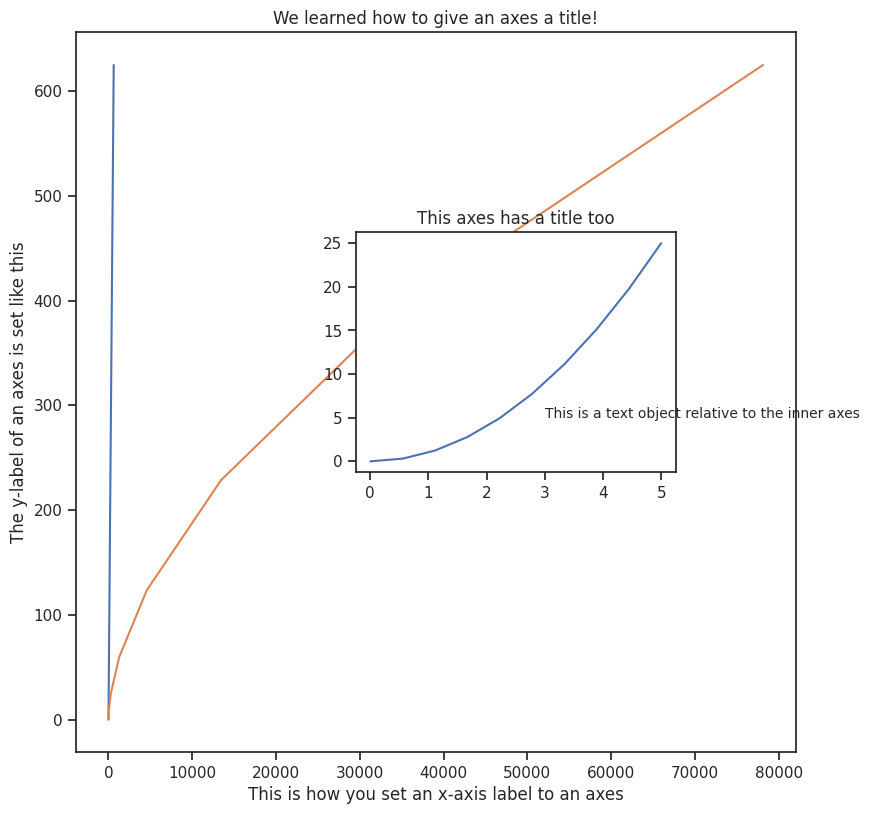

In [312]:
### Make the figure and axes objects ###
example_figure = plt.figure(figsize =(8,8), dpi = 100) #you give the size of the figure as a tuple of inches
example_axes_outer = example_figure.add_axes([0.1, 0.1, 0.9, 0.9]) #The list argument gives the relative location of the axes in percentage from the corners of the figure. The order is left, bottom, right, top. 
example_axes_outer.set_xlabel("This is how you set an x-axis label to an axes")
example_axes_outer.set_ylabel("The y-label of an axes is set like this")
example_axes_outer.set_title("We learned how to give an axes a title!")
example_axes_inner = example_figure.add_axes([0.45, 0.45, 0.4, 0.3])
example_axes_inner.set_title("This axes has a title too")

### Add something to the axes ###
example_axes_inner.plot(x_example_data, y_example_data)

# Multiple things, like lines can be plotted on same axis. 
example_axes_outer.plot(x_example_data**4, y_example_data**2)
example_axes_outer.plot(x_example_data**7, y_example_data**2)

# If you want to add other objects, you add them to axes too, like text
# Now you specify the location relative to the parent axes
example_axes_inner.text(3, 5, "This is a text object relative to the inner axes")

#Many more things can be added to axes in a similar way, not just text. 
#For more information there are many good tutorials available for example in youtube. 

_________
## <font color = Green> 7. Visualizing attribute value distributions </font>
**a)** Plot four histrograms of the Breadth using the Sturges', Scott's, square root and Freedman-Diaconis' methods to determine the number of bins. How are the numbers of bins calculated? Compare the distributions of different ship types. Do you think this a feasible attribute for classification, why? 

- Tip: it would be nice to use subplots when you have more than one plot. 

The Breadth stats are (for the future calculation):


count    133.000000
mean      20.212932
std        9.976906
min        5.000000
25%       12.900000
50%       16.900000
75%       25.240000
max       48.040000
Name: Breadth, dtype: float64

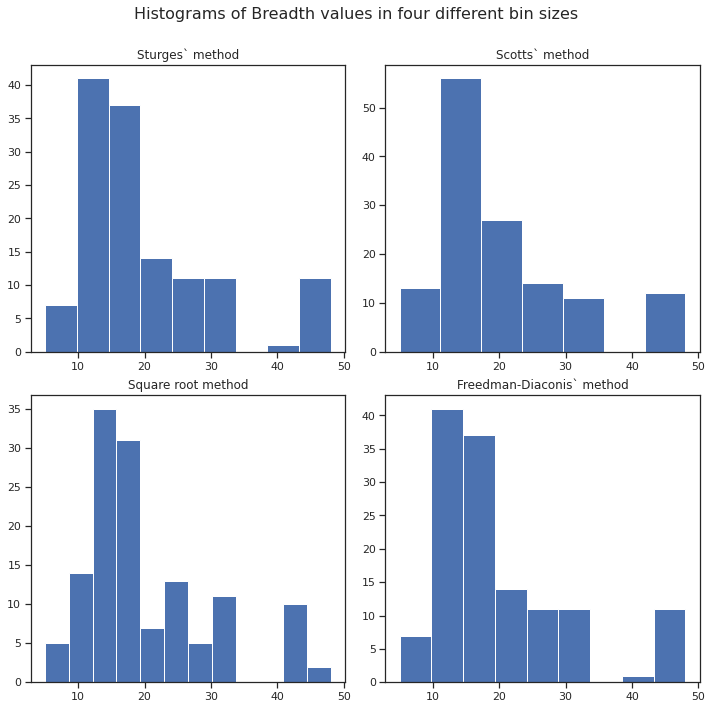

In [313]:
# The first step is to extract Breadth column into a new variable
breadths  = final_frame['Breadth']

# For the answer of the questions we need some stats out of the Breadth so let's print them
print('The Breadth stats are (for the future calculation):')
display(breadths.describe())

# And then the four histograms: Sturges', Scott's, square root and Freedman-Diaconis'
# https://numpy.org/devdocs/reference/generated/numpy.histogram_bin_edges.html
# .histogram_bin_edges(<data>, bins='type') to calculate the edges of the bins for the 4 different histograms
# Let's save them into variables first

sturges_bins = np.histogram_bin_edges(breadths, bins='sturges')
scotts_bins = np.histogram_bin_edges(breadths, bins='scott')
sqr_bins = np.histogram_bin_edges(breadths, bins='sqrt')
fd_bins = np.histogram_bin_edges(breadths, bins='fd')

# https://matplotlib.org/devdocs/gallery/subplots_axes_and_figures/subplots_demo.html
# > matplotlib used to check how to use subplots
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html
# .hist() to make the histograms
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(10,10)) # figsize used to get a little bigger plots
fig.suptitle('Histograms of Breadth values in four different bin sizes', size=16) # to get the main title

# Histogram using Sturge's method
# We could also give the bins counted by Sturges' method directly as a parameter (bins='sturges').....*
ax1.hist(breadths, bins='sturges')
ax1.set_title('Sturges` method')

# Histogram using Scotts' method
ax2.hist(breadths, bins='scott')
ax2.set_title('Scotts` method')

# Histogram using square root method
# *..... But we can use the values of .histogram_bin_edges methods too to determine the bin sizes
ax3.hist(breadths, sqr_bins)
ax3.set_title('Square root method')

# Histogram using Freedman-Diaconis' method
ax4.hist(breadths, fd_bins)
ax4.set_title('Freedman-Diaconis` method')

fig.tight_layout() # to nicely fit the subplots in the figure
fig.subplots_adjust(top=0.9) # to get the main title shifted up
plt.show() # to show the plots

<font color = red> According to the sources below, the number of bins for each histograms are calculated as follows: 

<font color = red> **Sturge's formula** is 
\begin{equation}
 k = 1 + \lceil log_2n \rceil,
 \end{equation}
 where k is the number of bins and n is the number of observations in the set. So the number of bins for Breadth is
\begin{equation}
 k = 1 + \lceil log_2(133) \rceil = 8.05528... = 9
\end{equation}

<font color = red> **Scott's rule** is
\begin{equation}
 h = \frac{3.49\hat \sigma}{{\sqrt[{3}]{n}}},
\end{equation}
where h is the bin width, σ is standard deviation and n the number of observation. So the width of the bins for Breadth is
\begin{equation}
 h = \frac{3.49*9.976906}{{\sqrt[{3}]{133}}} = 6.821... 
\end{equation}
and the number of bins can be calculated with the formula (x is the sample)
\begin{equation}
 k = \lceil \frac{max(x)-min(x)}{{h}} \rceil 
  = \lceil \frac{48-5}{6.821} \rceil = 7
\end{equation}

<font color = red> **Square root** is simply
\begin{equation}
 k = \lceil \sqrt{n} \rceil,
\end{equation}
so the number of bins can be calculated from the observations as
\begin{equation}
 k = \lceil \sqrt{133} \rceil = 11.532... = 12
\end{equation} 

<font color = red> And finally we have the **Freedman-Diaconis' rule** 
\begin{equation}
 h = 2\frac{IQR(x)}{{\sqrt[{3}]{n}}},
\end{equation}
where the bin width (h) is calculated for Breadth with the interquartile range (IQR = 3rd quartile - 1st quartile) and cube root
\begin{equation}
 h = 2\frac{25.24-12.9}{{\sqrt[{3}]{133}}} = 4.83498... \\
\end{equation} 
and similarly like with Scott's rule we can calculate the number of bins as follows
\begin{equation}
k = \lceil \frac{max(x)-min(x)}{{h}} \rceil 
 = \lceil \frac{48-5}{{4.83498}} \rceil = 8.90... = 9
\end{equation}

-------------------------
Sources:

 Airola, A. (2021). Data Understanding I. Lecture notes.

Muralidhar, KSV. (2016). How to decide on the number of bins of a Histogram?. https://medium.datadriveninvestor.com/how-to-decide-on-the-number-of-bins-of-a-histogram-3c36dc5b1cd8 (accessed: 17.11.2021)

Wikipedia. (2021). Histogram. https://en.wikipedia.org/wiki/Histogram (accessed: 17.11.2021)

**b)** Compare the distributions of the Breath variable between different ship types. Do you think this a feasible attribute for classification, why?
- *Tip What kind of plot can you do on a continuous variable? You only need to produce one plot, not multiple.*

,Cargo,Tanker,Tug
0,15.3,18.0,5.0
1,16.5,21.9,9.2
2,12.3,21.6,10.5
3,19.1,15.0,7.0


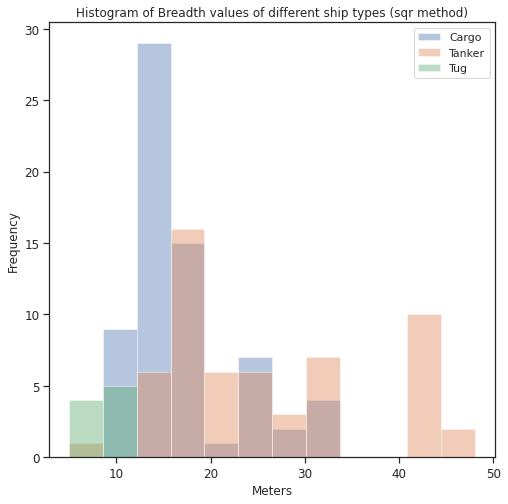

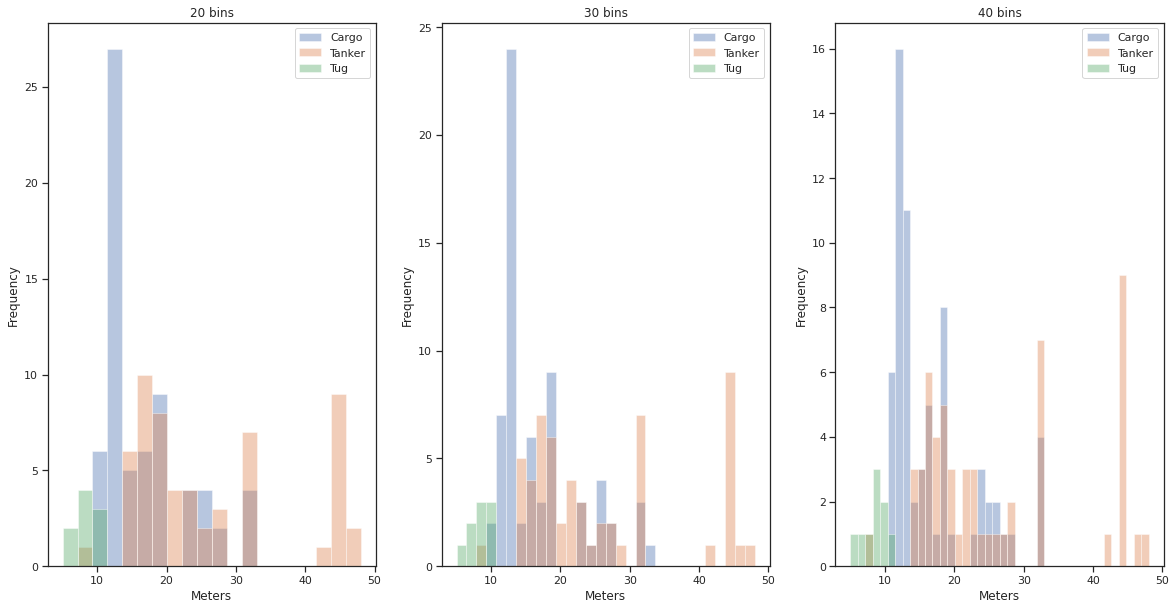

In [314]:
# First let's extract the Breadth values of each ship type (Cargo, Tanker and Tug) into variables
# by using the loc as previously done but now taking only values of Breadth column
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html
# reset.index() to reset indexes and drop=True to not to insert indexes into dataframe columns
cargos_breadth = final_frame[['Breadth']].loc[final_frame['Ship_type'] == 'Cargo'].reset_index(drop=True)
tankers_breadth = final_frame[['Breadth']].loc[final_frame['Ship_type'] == 'Tanker'].reset_index(drop=True)
tugs_breadth = final_frame[['Breadth']].loc[final_frame['Ship_type'] == 'Tug'].reset_index(drop=True)

# Let's concat them into a new single dataframe where ship types are the column names
# https://pandas.pydata.org/docs/reference/api/pandas.concat.html
# axis=1 to have them concated as separate columns 
all_breadths = pd.concat([cargos_breadth, tankers_breadth, tugs_breadth], axis=1)
# Let's rename the columns using the ship type names
all_breadths.columns = ['Cargo', 'Tanker', 'Tug']
display(all_breadths.loc[:3, :]) #Let's print only few rows to check the dataframe and columns

# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.hist.html
# Another way of making a histogram of breadths > .plot.hist() draws one histogram of the columns
# Let's have them histogram then; alpha=0.4 to provide transparency
# First selecting square root methods to define bin sizes
sqr_bins = np.histogram_bin_edges(breadths, bins='sqrt')
# Saving the plot into ax variable to be able to add xlabel
ax_ = all_breadths.plot.hist(alpha=0.4, bins=sqr_bins, figsize=(8,8), fontsize=12, title='Histogram of Breadth values of different ship types (sqr method)')
ax_.set_xlabel('Meters')

# But since it's difficult to estimate the number of bins without some research
# let's make a few histograms that are made with bins of different sizes
# and of course we use subplot
fig, (ax_1, ax_2, ax_3) = plt.subplots(1,3, figsize=(20, 10))

ax_1.set_xlabel('Meters') # to get xlabel named on each subplot
ax_2.set_xlabel('Meters')
ax_3.set_xlabel('Meters')

# Placing the histograms into the subplot by ax=<ax num>
all_breadths.plot.hist(ax=ax_1, bins=20, alpha=0.4, title='20 bins')
all_breadths.plot.hist(ax=ax_2, bins=30, alpha=0.4, title='30 bins')
all_breadths.plot.hist(ax=ax_3, bins=40, alpha=0.4, title='40 bins')

plt.show()

<font color = red> I would say Breadth is a good attribute for classification. We can see histograms with 30 or 40 bins are kinda similar so there is not showing that big difference than between 20 and 30, not to mention the difference between bins calculated by square root method and 20-30 bins. The arguments that follow are based on the histograms with 40 bins.

<font color = red> From the histograms we can see that Cargos, Tankers and Tugs have a little different distributions. **Tugs** are the smallest vessels and most of the breadths are less than 10 meters. **Cargos** could be seen being in the "between" of all ship types. Most of the width of Cargos are more than 10 but less than 20 meters. **Tankers** have the biggest variance in the Breadth sizes: they can be less than 20 meters but also a little less than 50 meters in width. 


**c)**	Explain what a boxplot is. Plot them for the numeric attributes (excluding 'Origin') grouped by the ship type. Do you see outliers that require some action?

,MMSI,Speed,COG,Destination,Ship_type,Gross_tonnage,Length,Breadth
0,212209000.0,10.1000,64.3000,Hamina,Cargo,3416,94.9,15.3
1,212436000.0,13.5256,77.0755,Hamina,Tanker,6280,116.9,18.0
2,219082000.0,9.9000,74.7000,Hamina,Tanker,9980,141.2,21.9


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

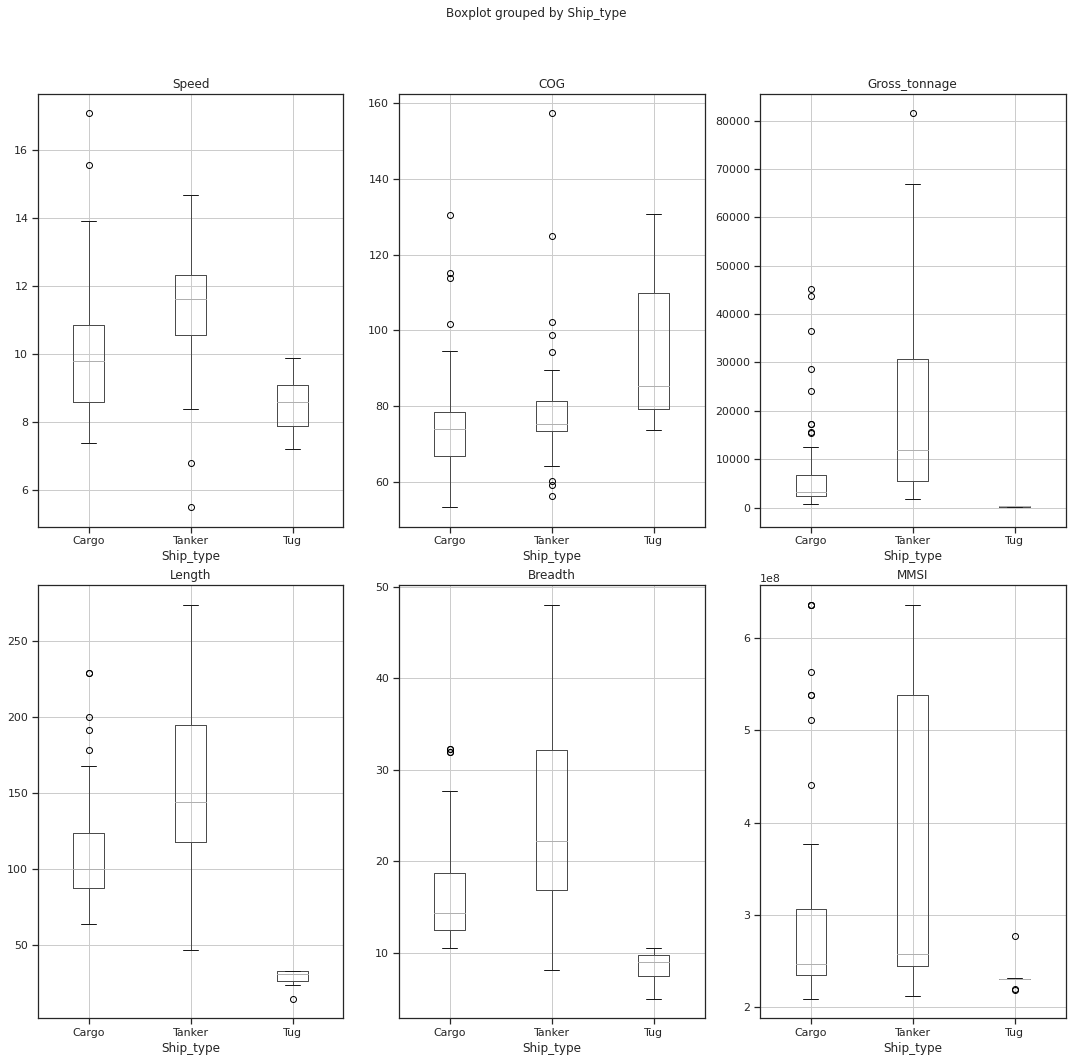

In [315]:
# Let's take only columns with numeric attributes excluding Origin by using .loc[]
originless_frame = final_frame.loc[:, final_frame.columns != 'Origin']
display(originless_frame.iloc[:3, :]) # let's see what we have in the first 5 rows - looks fine to me

# Let's have the boxplots of different attributes in a subplot
fig, ax = plt.subplots(2,3,figsize=(15,15))
fig.suptitle('Boxplots grouped by Ship_type')

# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html
# placed in the subplot with ax=ax[<row>,<column>] and grouped by by='Ship_type'
# to get all attributes grouped by the ship types;
originless_frame.boxplot('Speed', by='Ship_type', ax=ax[0,0]) # Speed plot
originless_frame.boxplot('COG', by='Ship_type', ax=ax[0,1]) # COG plot
originless_frame.boxplot('Gross_tonnage', by='Ship_type', ax=ax[0,2]) # Gross_tonnage plot
originless_frame.boxplot('Length', by='Ship_type', ax=ax[1,0]) # Length plot
originless_frame.boxplot('Breadth', by='Ship_type', ax=ax[1,1]) #Breadth plot
originless_frame.boxplot('MMSI', by='Ship_type', ax=ax[1,2]) #MMSI

# !! parameter showfliers=False could be used to get rid of the outliers 
# !! tho it's not done with these boxplots because of the outlier analysis below

fig.tight_layout()
fig.subplots_adjust(top=0.9)
plt.show()

<font color = red> According to the references below, a boxplot is a standardized way of displaying the distribution of data and it gives a good indication of how the values are spead out. It's good for continuous attributes. A boxplot summarises five different values of the distribution: minimum value, first quartile, third quartile, median and maximum value. 

<font color = red>There are some guiding principles for determining these values:
*  <font color = red>**median** - is the middle value of the dataset. Same as 2nd quartile (Q2) or 50th percentile. 
*  <font color = red>**1st quartile** (Q1) - the median of the lower half of the dataset; 25th percentile
* <font color = red>**3rd quartile** (Q3) - the median of the upper half of the dataset; 75th percentile
* **IQR** (interquartile range) -  the distance between Q1 and Q3 where 50% of the data is; $Q_3-Q_1$
* <font color = red>**maximum** - the highest datapoint _excluding_ outliers; $Q_3+1.5*IQR$
* <font color = red>**minimum** - the lowest datapoint _excluding_ outliers; $Q_1-1.5*IQR$

<font color = red>In boxplots above, the **median** is the <font color = green > green </font> line inside boxes. **Q1** is the left-hand side of the box and **Q3** the right-hand side of the box. The whole box is **IQR**. **Minimum** is the small vertical line on the left and **maximum** the small vertical line on the right. The lines between boxes and vertical lines are called **whiskers**. Whiskers are used to indicate variability outside Q1 and Q3. 

<font color = red>The shape of a boxplot can show if a data set is normally distributed or skewed. If median is in the middle of the box and whiskers are the same sizes, the distribution is _symmetric_. If median is closer to the bottom (/right side) and the whisker on the lower end (/right side) is shorter, the distribution is _positively skewed_. If median is closer to the top (/left side) and the whisker on the upper end is shorter, the distribution is _negatively skewed_.

<font color = red>Boxplots are also good for visually detecting **outliers**. They are the dots in the boxplots above. For example, in Speed histogram, there are four outliers (two on the left side of Tanker data and two on the right side of Cargo data). As it can be seen, an outlier is a value or object which is far from the rest of the data. 

<font color = red>How the outliers should be treated is entirely up to the research. One would want to research them but other might want to get rid of them, so sometimes it's useful just to exclude them from the analysis. It's important to recognise the influence of outliers on key values in the whole data set, such as the mean, which could be negatively affected by just one really large outlier. On the other hand, some knowledge of the research matter is expected of the researcher to evaluate whether the outliers are true outliers or erroneously inputed data. Wrongly inputted data sure needs to be cleaned. 

<font color = red> In my opinion, boxplot shows more clearly that Breadth is a good attribute for classification (ex 5b) since the median and IQR is clearly different between the ship types. Those values could help with classification.

--------------------------

Airola, A. (2021). Data Understanding II. Lecture notes.

Galarnyk, M. (2018). Understanding Bloxplots. https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51 (accessed: 18.11.2021)

McLeod, S. (2019). What does a box plot tell you? https://www.simplypsychology.org/boxplots.html

Wikipedia. (2021). Boxplot. https://en.wikipedia.org/wiki/Box_plot (accessed: 18.11.2021)

##  <font color = purple> 8. Relationships between attributes

#### a) Plot pairwise scatter plots of the numerical attributes. What kind of relationships can you see? Can you see any outliers? 
- *this can be done in one line*

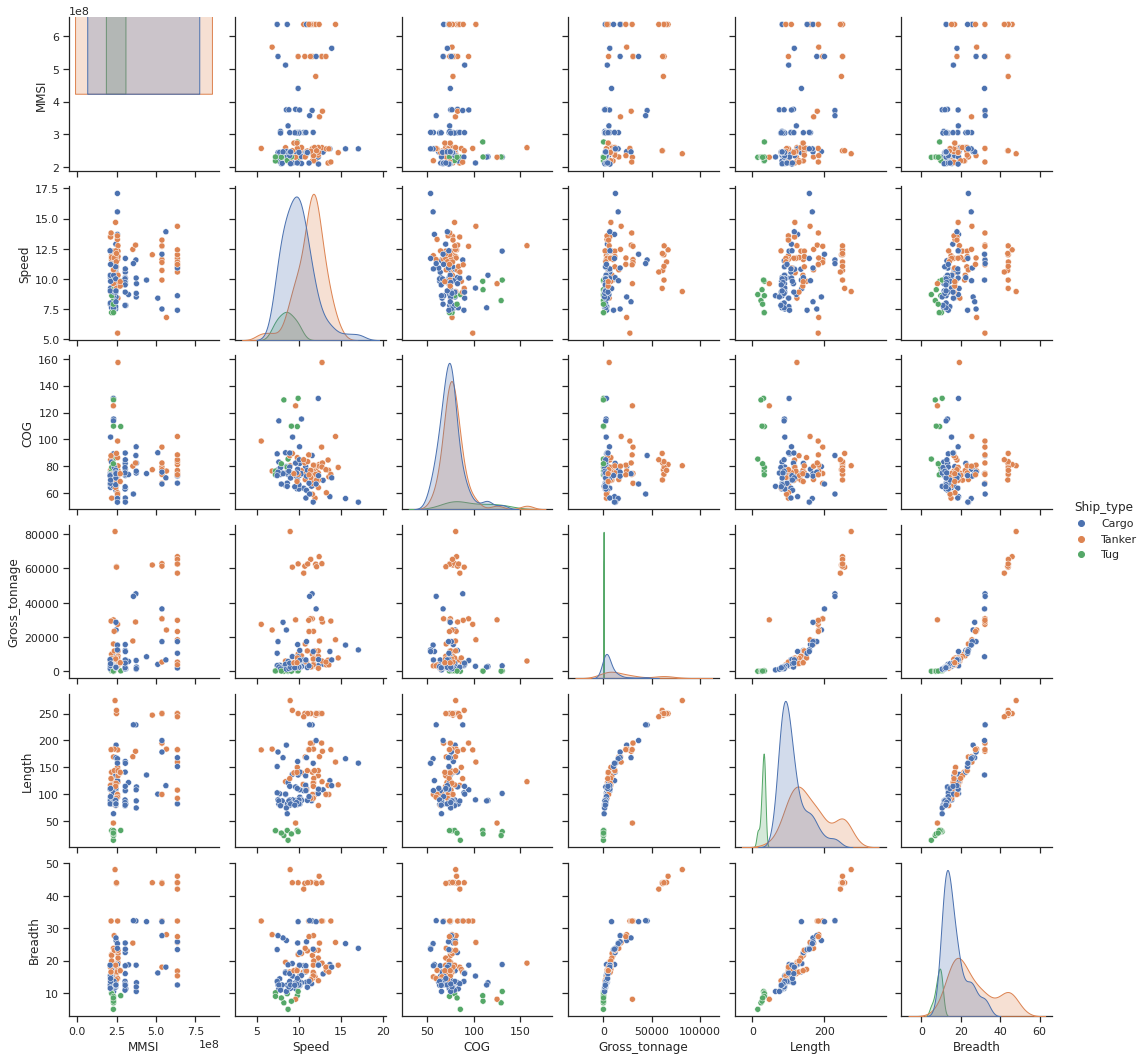

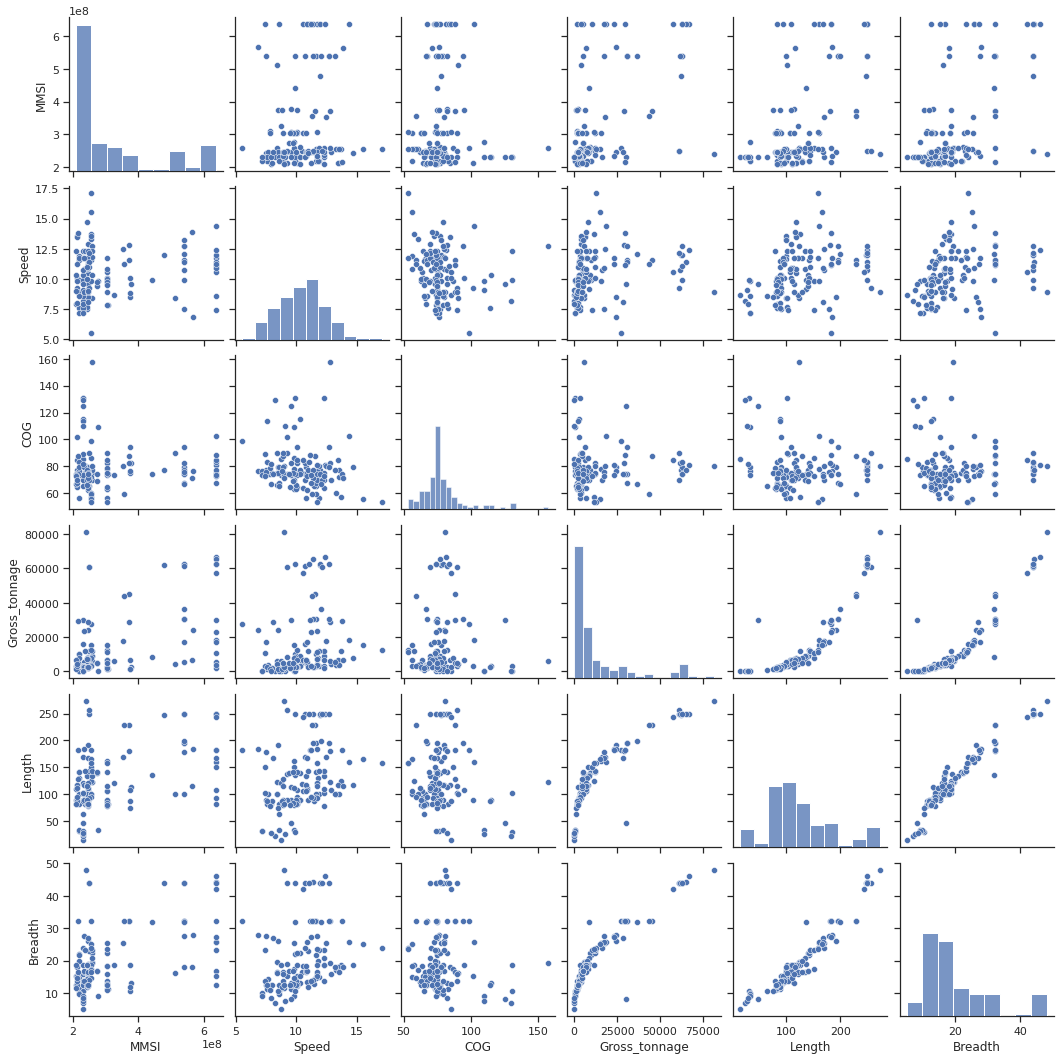

In [316]:
# We could get only the numerical attributes from the original dataframe as shown:
num_frame = final_frame.loc[:, final_frame.columns != 'Origin'].select_dtypes(np.number)

# And then do some matrix stuff with scatter plots
# https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html?highlight=scatter%20matrix#pandas.plotting.scatter_matrix
# pd.plotting.scatter_matrix(num_frame, figsize=(15,15), alpha=0.5)

# Or actually, let's use the more beautiful seaborn matrix of the same thing
# https://seaborn.pydata.org/generated/seaborn.pairplot.html
# using hue="Ship_type" to map the different ship types to different colors
# NOTE! here using the dataframe from the previous exercise to get the Ship_type included
sns.set_theme(style="ticks")
sns.pairplot(originless_frame, hue="Ship_type")

# But also with only numeric attributes
sns.pairplot(num_frame)

<font color = red> As we can see, there are relationships between Length and Gross_tonnage, Breadth and Gross_tonnage, and Breadth and Length. Length vs Gross_tonnage and Breadth vs Gross_tonnage seem to have an exponential relationship where as a relationship Length vs Breadth is more linear. Outliers can be easily seen in each scatterplots; the single dots which are away from the rest of the data, especially scatterplots where Gross_tonnage is one attribute. Length vs Breadth seems to be highly correlated.

The other relationship don't seem to be identifiable. </font>

**b)** Make a new clean dataframe without outlier(s) and replot. What difference do you see? 
- *include the most relevant attributes only, or limit to those needed in next task*

Max and min before the z score standard:


Gross_tonnage    81502.00
Length             274.00
Breadth             48.04
dtype: float64

Gross_tonnage    100.0
Length            15.0
Breadth            5.0
dtype: float64

Max and min after the z score standard:


Gross_tonnage    66855.0
Length             255.9
Breadth             46.0
dtype: float64

Gross_tonnage    100.0
Length            15.0
Breadth            5.0
dtype: float64

Max and min values after IQR method


Gross_tonnage    30641.00
Length             195.20
Breadth             32.24
dtype: float64

Gross_tonnage    100.0
Length            15.0
Breadth            5.0
dtype: float64

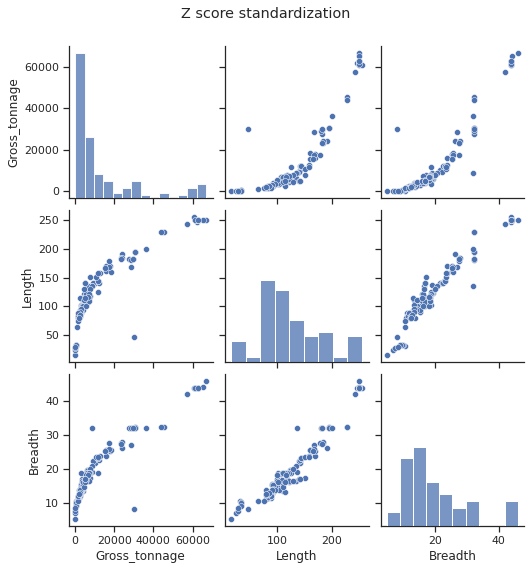

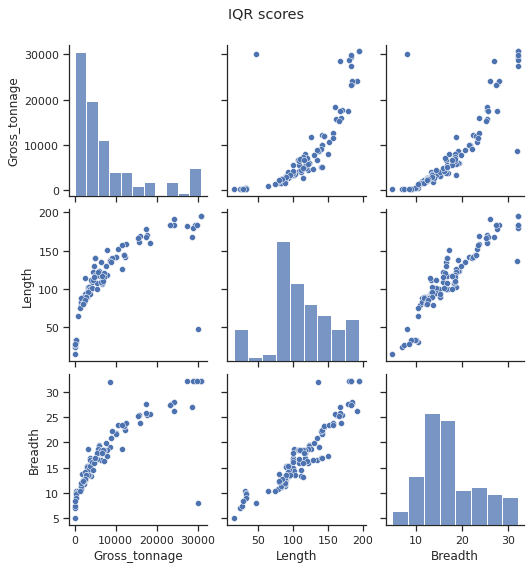

STATS WITHOUT REMOVING OUTLIERS


,Gross_tonnage,Length,Breadth
count,133.00000,133.000000,133.000000
mean,13599.62406,127.178571,20.212932
std,18488.17812,57.793138,9.976906
min,100.00000,15.000000,5.000000
25%,2548.00000,88.900000,12.900000
50%,5440.00000,115.000000,16.900000
75%,15633.00000,159.970000,25.240000
max,81502.00000,274.000000,48.040000


STATS WITH Z SCORE


,Gross_tonnage,Length,Breadth
count,132.000000,132.000000,132.000000
mean,13085.212121,126.066288,20.002121
std,17577.227186,56.566271,9.713016
min,100.000000,15.000000,5.000000
25%,2543.000000,88.750000,12.875000
50%,5348.500000,114.450000,16.900000
75%,15408.750000,158.500000,24.160000
max,66855.000000,255.900000,46.000000


STATS WITH IQR METHOD


,Gross_tonnage,Length,Breadth
count,118.000000,118.000000,118.000000
mean,7770.542373,112.171949,17.457627
std,8245.116679,41.505837,6.418332
min,100.000000,15.000000,5.000000
25%,2425.000000,88.000000,12.500000
50%,4405.000000,107.515000,16.400000
75%,9749.000000,140.725000,21.400000
max,30641.000000,195.200000,32.240000


In [317]:
# Let's include only the most relevant attributes that we identified in the last exercise
relAttr_df = num_frame.iloc[:, 3:6] # Gross_tonnage, Length & Breadth
print('Max and min before the z score standard:')
display(relAttr_df.max(), relAttr_df.min())
# And gotta clean the outliers out of them
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.zscore.html
# https://androidkt.com/detect-and-remove-outliers-from-pandas-dataframe/
# Need to calculate the Z score. It re-scales and center the data and look for data point
# which are too far from center. Data points far from center will be treated as outliers!
# So let's do this:

# stats.zscore(<dataframe>) computes z score of each value in the column
# z < 3 to not have the z scores below or above the threshold of 3 or -3
# .all(axis=1) so that we know if there's even one True in a column per row
zscore_df = relAttr_df[np.abs((stats.zscore(relAttr_df)) < 3).all(axis=1)]
print('Max and min after the z score standard:')
display(zscore_df.max(), zscore_df.min())

# Then let's have the same pairwise scatter plot thing than in the previous exercise
gg = sns.pairplot(zscore_df)
gg.fig.suptitle('Z score standardization', y=1.05) # y=1.05 to have some height for title

# Let's try to get rid of the outlier by IQR method then
Q1 = relAttr_df.quantile(0.25) # get the 25th percentale
Q3 = relAttr_df.quantile(0.75) # get the 75th percentale
IQR = Q3 - Q1 # calculating IQR as previously introduced (ex 7c)
min_bound = Q1 - 1.5 * IQR # both calculated as previously intoduced (ex 7c)
max_bound = Q3 + 1.5 * IQR

# .any(axis=1) check the at least one True per row
# ~ (tilde) for inverting boolean values (the values would be False otherwise)
iqr_frame = relAttr_df[~((relAttr_df < min_bound) | (relAttr_df > max_bound)).any(axis=1)]
print('Max and min values after IQR method')
display(iqr_frame.max(), iqr_frame.min())

# Then just get the pairplot to see the difference between Z score and IQR method
g = sns.pairplot(iqr_frame)
g.fig.suptitle('IQR scores', y=1.05)

plt.show()

# Sure it's interesting to know what happened e.g. for mean
print('STATS WITHOUT REMOVING OUTLIERS')
display(relAttr_df.describe())
print('STATS WITH Z SCORE')
display(zscore_df.describe())
print('STATS WITH IQR METHOD')
display(iqr_frame.describe())

<font color = red> I used both ***Z scores*** and ***IQR method*** to deal with outliers. Z score does re-scale and normalize the data as can be seen from plots above. According to the sources below, IQR divides the data into quartiles itself and is similar to Z score -- it finds the distribution and then keep some threshold to identify the outliers. When IQR used, we keep only the valid values. 

<font color = red> The ranges of scatter plots and histograms has got smaller after using Z score standardization or IQR scores to get rid of the outliers. For example Gross_tonnage range was originally between approx. [0..80 0000] but after Z scores it was approx. [0..66 000] and after IQR approx. [0...30 000] so the really big values were excluded fom the data. One can definitely see differences in histograms too after IQR scores: the furthest poles were excluded. Sure the furthests dots in scatterplots were also removed.  

<font color = red>IQR method removed values more "boldly" than Z score: After Z score there was 1 row removed (number drops from 133 to 132) but after IQR there was only 118 rows left from the original data. 

<font color = red>The descriptive statistics show kinda big changes for example in the mean values. Without removing the ouliers, the mean of Gross tonnage is ~13 599, after Z score it's 13 085 and after IQR it drops to 7 770. So it does really matter what kind of a method is used to clean the data out of outliers. Sure we can see changes with stds and different quartiles too, among also the other attributes. Even one removed outlier can change the statistics of the dataframe quite much </font>

-------
Sources:

Knowledge Transfer. (2021). Detect and Remove Outliers from Pandas DataFrame. https://androidkt.com/detect-and-remove-outliers-from-pandas-dataframe/ (accessed: 18.11.2021)

Wikipedia. (2021). Interquartile range. https://en.wikipedia.org/wiki/Interquartile_range (accessed: 19.11.2021)

Wikipedia. (2021). Standard Score. https://en.wikipedia.org/wiki/Standard_score (accessed: 19.11.2021)

__________
## <font color = purple> 9. Correlation and heatmap </font>

**a)** Explain what are
- Pearson's correlation
- Spearman's rho and 
- Kendall's tau?

<font color = red> The following explanations are based on the references below.

<font color = red>So first, we have two important statistical measurements:
* <font color = red>Sample variance ($s_x^2$) = how spread out the data is </font>
\begin{equation}
s_x^2 = 
 \frac{1}{n-1}\sum_{i=1}^{n} (x_i - \bar{x})^2
\end{equation}
* <font color = red>Sample covariance ($s_{xy}$) = how two variables vary together</font>
\begin{equation}
s_{xy} = 
 \frac{1}{n-1}\sum_{i=1}^{n} (x_i - \bar{x})(y_i-\bar{y}),
\end{equation}
 <font color = red>where {$x_1, x_2, ..., x_n$} and {$y_1, y_2, ..., y_n$} are two samples of the equal size. 
 > <font color = red>When two attributes tend to move together, they have a _positive_ covariance, i.e. they are correlated. When they tend to move in reverse, they have a _negative_ covariance, i.e. they are inversely correlated.
-------------------

<font color = red>The sample **Pearson's correlation coefficient** (PCC) is a measure for a _linear_ relationship between two numerical attributes $X$ and $Y$. It's about dividing covariance by the product of standard deviations to normalize it between [-1, 1]. The larger the absolute value of PCC, the stronger the linear relationship between these two attributes. PCC is defined as 

\begin{equation}
r_{xy} = 
\frac{1}{n-1}\sum_{i=1}^{n} (\frac{x_i - \bar{x}}{s_x})(\frac{y_i-\bar{y}}{s_y}) =
 \frac{ \sum_{i=1}^{n} (x_i - \bar{x})(y_i-\bar{y})}
 {(n-1)s_x s_y}
 = \frac{s_{xy}}{s_ x s_ y},
\end{equation}

<font color = red>where $\bar{x}$ and $\bar{y}$ are the mean values of $X$ and $Y$ and $s_x$ and $s_y$ are the corresponding sample standard deviations. Given data is paired {$(x_1, y_1),...,(x_n,y_n)$} consisting of $n$ pairs. So $\bar{x}$ (and analogously for $\bar{y}$) and the sample standard deviations $s_x$ (and analogously for $s_y$) can be defined as 

\begin{equation}
\bar{x} = 
 \frac{1}{n}\sum_{i=1}^nx_i \\
 s_x = 
 \sqrt{\frac{1}{n-1}\sum_{i=1}^n (x_i-\bar{x})^2} = \sqrt{s_x^2}
\end{equation}

<font color = red>If $|r_{xy}|=1$ then the values of $X$ and $Y$ lie exactly on a line. Positive correlation indicates the slope of the line being positive and similarly negative correlation indicates the slope of the line being negative. If there ain't correlation between attributes, the value is 0.  

 ---------------------

<font color = red>**Spearman's rank correlation coefficient** (Or Spearman's ρ (rho)) assesses how well the relationship between two variables $X$ and $Y$ can be described using a monotonic function, i.e. rank correlation measures _monotonic_ relationship between attributes. It's defined as 

\begin{equation}
ρ = 1-6
 \frac{ \sum_{i=1}^{n} (r(x_i)-r(y_i))^2}{n(n^2-1)}
 = 1-\frac{6 \sum d_i^2}{n(n^2-1)},
\end{equation}

<font color = red>where $r(x_i)$ (and analogously for $r(y_i)$) is the rank of the value $x_i$ ($y_i$) and $d_i$ is the difference between the two ranks of each observations ($= r(x_i)-r(y_i)$). $n$ is the number of all observations. 

<font color = red> Intuitively, ρ is high when observations have a similar rank (1,2,3 vs 1,2,3) and low when observations have a dissimilar rank (1,2,3 vs 3,2,1) between the two variables. So when the rankings of x and y are exactly in the same order, we obtain the value 1 and when the rankings are in reverse order, we get the value -1. 

-----------

<font color = red>**Kendall's tau rank correlation coefficient** (Kendall's τ (tau)) measures the ordinal association between two measured quantities. It's defined as

\begin{equation}
τ = \frac{C-D}{\frac{1}{2}n(n-1)} = \frac{C-D}{\binom{n}{2}},
\end{equation}

<font color = red>where $C$ and $D$ are the number of concordant and discordant pairs. The binomial coefficient $\binom{n}{2}$ defines the total number of pairs, i.e. the number of ways to choose two items from $n$ items. The concordant and discordant pairs have some conditions as

\begin{align*}
C = |\{\,(i,\, j)\,| \, x_i \, < \, x_j \ \text{and} \; y_i \,< \, y_j\}| \\
D = |\{\,(i,\, j)\,| \, x_i \, > \, x_j \ \text{and} \; y_i \,> \, y_j\}|
\end{align*}

<font color = red>The coefficient is value 1 if the agreement is perfect, i.e. they are the same, and the coefficient value is -1 if the disagreement is perfect, i.e. one ranking is in reverse. The value is 0, if $X$ and $Y$ are independent. 

-----------
Airola, A. (2021). Data Understanding I. Lecture notes.

Airola, A. (2021). Data Understanding II. Lecture notes.

Wikipedia. (2021). Kendall rank correlation coefficient. https://en.wikipedia.org/wiki/Kendall_rank_correlation_coefficient (accessed: 19.11.2021)

Wikipedia. (2021). Pearson correlation coefficient. https://en.wikipedia.org/wiki/Pearson_correlation_coefficient (accessed: 19.11.2021)

Wikipedia. (2021). Spearman's rank correlation coefficient. https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient (accessed: 19.11.2021)

**b)** Calculate the correlation coefficient matrices. What kind of relationships there are between the attributes? You can use a heatmap to visualize the matrices and more easily see the strength of the relationship. **See what kind of a difference there is between the cleaned dataset and the non-cleaned dataset.**

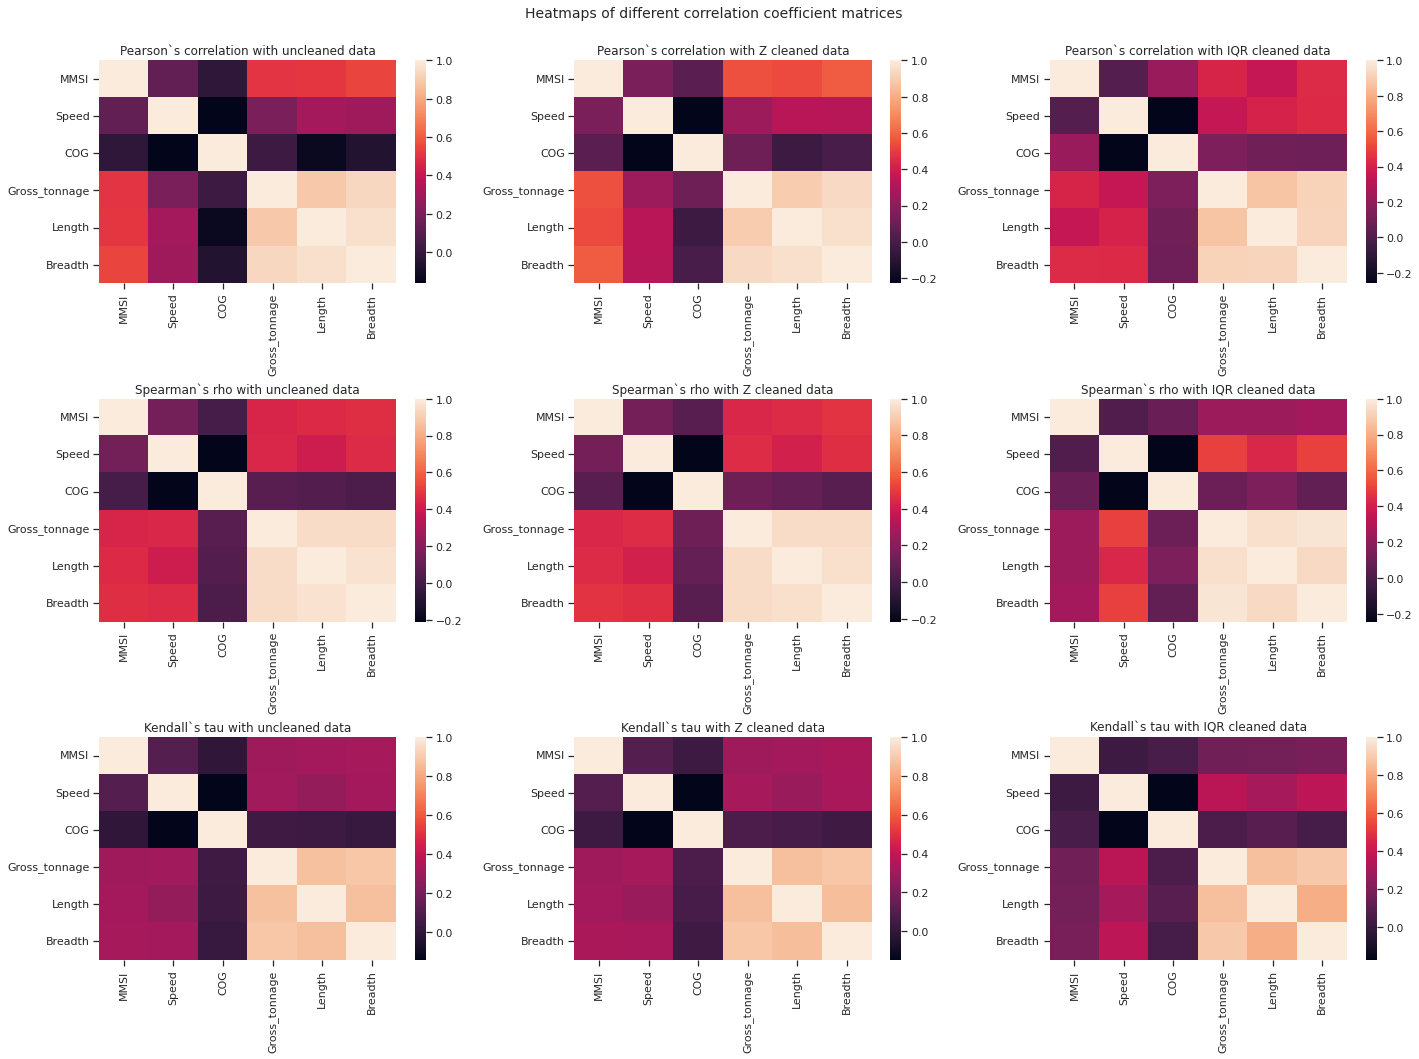

In [318]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
# .corr() to compute pairwise correlation of columns (excludes Na/null values)
# parameter 'method' to choose pearson, kendall of spearman
# https://seaborn.pydata.org/generated/seaborn.heatmap.html
# sns.heatmap() to plot rectangular data as a color-encoded matrix

# Let's first compute and visualice the correlation of the original dataframe where no Z score standardations are done
# the original dataframe without the Origin column = originless_frame (same as final_frame without Origin; concatted, without duplicates and NaNs)
# And let's do the same thing at the same time to the dataframe where there are no outliers - with both methods, Z score and IQR 

#### Use the Z score standardization to get rid of the outliers of originless_frame ####
# First, extracting only the numeric attributes for calculations using .select_dtypes(np.number)
numeric_frame = originless_frame.select_dtypes(np.number)
zscore_df = numeric_frame[np.abs((stats.zscore(numeric_frame)) < 3).all(axis=1)]

#### Count the necessary bounds and quartiles for IQR method ####
Q1 = numeric_frame.quantile(0.25) # get the 25th percentale
Q3 = numeric_frame.quantile(0.75) # get the 75th percentale
IQR = Q3 - Q1 # calculating IQR as previously introduced (ex 7c)
min_bound = Q1 - 1.5 * IQR # both calculated as previously intoduced (ex 7c)
max_bound = Q3 + 1.5 * IQR
# .any(axis=1) check the at least one True per row
# ~ (tilde) for inverting boolean values (the values would be False otherwise)
iqr_df = numeric_frame[~((numeric_frame < min_bound) | (numeric_frame > max_bound)).any(axis=1)]

##############################################################################
# Get them side by side with subplot
fig, axes = plt.subplots(3,3, figsize=(20,15))
fig.suptitle('Heatmaps of different correlation coefficient matrices', size=14) #maintitle

#--------------------------------------------------------------------#
### Pearson's correlation ###
# Original data
sns.heatmap(numeric_frame.corr(method='pearson'), ax=axes[0][0])
axes[0][0].title.set_text('Pearson`s correlation with uncleaned data')

# Cleaned data - Z score
sns.heatmap(zscore_df.corr(method='pearson'), ax=axes[0][1])
axes[0][1].title.set_text('Pearson`s correlation with Z cleaned data')

# Cleaned data - IQR
sns.heatmap(iqr_df.corr(method='pearson'), ax=axes[0][2])
axes[0][2].title.set_text('Pearson`s correlation with IQR cleaned data')
#--------------------------------------------------------------------#
### Spearman's rho ###
# Original data
sns.heatmap(numeric_frame.corr(method='spearman'), ax=axes[1][0])
axes[1][0].title.set_text('Spearman`s rho with uncleaned data')

# Cleaned data - Z score
sns.heatmap(zscore_df.corr(method='spearman'), ax=axes[1][1])
axes[1][1].title.set_text('Spearman`s rho with Z cleaned data')

# Cleaned data - IQR
sns.heatmap(iqr_df.corr(method='spearman'), ax=axes[1][2])
axes[1][2].title.set_text('Spearman`s rho with IQR cleaned data')
#--------------------------------------------------------------------#
### Kendall's tau ###
# Original data
sns.heatmap(numeric_frame.corr(method='kendall'), ax=axes[2][0])
axes[2][0].title.set_text('Kendall`s tau with uncleaned data')

# Cleaned data - Z score
sns.heatmap(zscore_df.corr(method='kendall'), ax=axes[2][1])
axes[2][1].title.set_text('Kendall`s tau with Z cleaned data')

# Cleaned data - IQR
sns.heatmap(iqr_df.corr(method='kendall'), ax=axes[2][2])
axes[2][2].title.set_text('Kendall`s tau with IQR cleaned data')
#--------------------------------------------------------------------#

fig.tight_layout() # to get subplots nicely fit side by side
fig.subplots_adjust(top=0.93) # To get some space for maintitle
plt.show()

<font color = red> As the previous exercises showed relationships in scatterplots, the same relationship can be seen from the heatmaps of the different correlation coefficients. **Gross_tonnage vs Breadth**, **Gross_tonnage vs Length** and **Breadth vs Length** can bee seen to have significant linear correlations, the values being between approx. [0.8, 1] (the value 1 being in the diagonal line (the histograms shown before)). So it indicates that they have _positive_ relationships:  if one increases, so does the other. There seems not to be any correlation between **COG vs Speed**, since the value is (close to) zero.

<font color = red>It can be quite clear to see that with Z score cleaned data, the weakest correlations, value being closer to zero, have got a little better (the colors getting brighter, e.g. COG vs Gross_tonnage). There are even bigger difference between IQR cleaned data and uncleaned data, since the IQR method cleaned data more boldly (118 datapoints after, 133 before the cleaning). So cleaning the data might better the correlations or at least show them more clearly. Removing the outliers can be seen to give a better way of the true correlation between the attributes since the really large outliers can skew the correlation coefficients heavily. 
 
With Kendall tau, the three previously mentioned pairs with strong linear relationship have a little worse relationship (lower correlation) than with two other correlation coefficient. That's because Kendall tau is a test of strength of dependence, but Pearson and Spearman "only" correlate distributed data. 
</font>

____________
## <font color = dollargreen >   10. BONUS Dimensionality reduction</font>  
- <font color = red> Answers that only state what you can see are not enough. </font> You need to explain _why_ rather than what and demonstrate you understand what you are doing. By copypasting code from stackoverflow you will not learn much.
____________

- **a)** Explain what principal component analysis is.

<font color = red> The upcoming explanation is entirely based on the references below.

<font color = red>**Principal Component Analysis** (PCA) is the process of computing the _principal components_ to use them to perform a change of basis on the data: One sometimes uses the first few components when the rest of them are ignored. _Principal components_ are the new variables made of linear combinations or mixtures of the initial variables. The new variables are supposed to be uncorrelated and constructed in the way that the first components have the most of the information compressed into them. This way organized information will help to reduce dimensionality without losing much information.

I.e. PCA is a dimensionality-reduction method for making predictive models. It reduces dimensionality by projecting each data point onto the first few principal components while trying to preserve as much information as possible. Sure, reducing the number of variables affects on the accuracy, but that trade-off is made for the sake of simplicity. Smaller data sets are easier and faster to explore and analyze with machine learning algorithms. So, we can use PCA to reduce the dimensionality but also to interpret the importance of components explaining the covariation. </font>

<font color = red>PCA can be divided into five phases which I'm going to use as a structure of this explanation

1. Standardize the range of continuous initial variables
2. Compute the covariance matrix
3. Compute the eigenvectors and eigenvalues of the covariance matrix
4. Create a feature vector
5. Recast the data along the principal components axes

<font color = red>Firstly, the range of variables needs to be standardize, since the differences can be so large that the largest ranges dominate the rest. That will lead to biased results of analysis. This can be done with Z score standardization as

\begin{equation}
z = \frac{x-\bar{x}}{SD}
\end{equation}

<font color = red>for each value of each variable. There $z$ is the Z standardized score, $x$ is the value, $\bar{x}$ is the mean and $SD$ is the standard deviation.

<font color = red>Secondly, we need covariance matrix to see if there is any relationship between the variables. Sometimes highly correlated variables may contain redundant information. The covariance matrix is $p$-dimensional ($p$ variables) and it has the covariances associated with all possible pairs of the initial variables. So we can define the covariance matrix as 

\begin{bmatrix}
s_1^2 & s_{12} & \cdots & s_{1p}\\
s_{21} & s_2^2 & \cdots & s_{1p}\\
\vdots & \vdots & \ddots &  \vdots\\
s_{p1} & s_{p2} & \cdots & s_p^2\\
\end{bmatrix}

<font color = red>As we can see, we also have the variances of each variable in the main diagonal, since the covariance of a variable with itself is its variance ($s_{pp}=s_p^2$). The mathematical explanations and formulas of the variance and covariance can be found in the exercise 9a. 

<font color = red>Thirdly, we need to compute the eigenvectors and eigenvalues of the covariance matrix to finally identify the principal components. Eigenvectors and eigenvalues come in pairs so every eigenvector has its eigenvalue. There are as many eigenvector-eigenvalue pairs as there are dimensions. So, a $p$-dimension data has $p$ variables and yet there are $p$ eigenvectors with $p$ corresponding eigenvalues. 

> <font color = red>Eigenvector = principal component = the direction of the ax where there is the most variance 
>
><font color = red>Eigenvalue = the amount of variance carried in each eigenvector

<font color = red>After we have the principal components, we divide the eigenvalues by the sum of eigenvalues so we get the percentage of variance (information) accounted for by each component. Thus we can rank the eigenvectors in order of their eigenvalues to get them in the order of signifigance.

<font color = red> Fourthly, as we have the eigenvalues in descending significance order, we need to choose which components we are supposed to keep and which ones we discard. With the remaining ones we form a feature matrix; the columns of the matrix are the eigenvectors of the components. How to choose which components are kept is based on what is researched. Sometimes one could want to keep also the lesser significant components if there is no need to reduce the dimension. 

<font color = red> Lastly, we use the feature vector to reorient the data to the axes which are represented by the principal components. We can do it by multiplying the transpose of feature vector by the transpose of the standardized original data. 

--------------------------
Helwig, N.E. (2017). Principal Components Analysis. University of Minnesota. Lecture notes. http://users.stat.umn.edu/~helwig/notes/pca-Notes.pdf (accessed: 20.11.2021)

Jaadi, Z. (2021). A Step-by-Step Explanation of Principal Component Analysis (PCA). https://builtin.com/data-science/step-step-explanation-principal-component-analysis (accessed: 20.11.2021)

Wikipedia. (2021). Principal component analysis. https://en.wikipedia.org/wiki/Principal_component_analysis (accessed: 20.11.2021)

- **b)** Do it with and without z-score standardization. 

In [319]:
# Script: PCA with z-score standardization
#-------------------------------------------#
# So we have the data in originless_frame but let's get rid of the identifying 
# number of vessel too since it's only identifying and not giving any 
# interesting information
std_frame = originless_frame.loc[:, originless_frame.columns != 'MMSI']
display(std_frame.iloc[:3, :])

# Let's get the classes out of ship types so gonna save the Ship_types into a variable
ship_types = std_frame.loc[:, ['Ship_type']].values

# And now let's get rid of the columns which doesn't have the numeric values
sdf = std_frame.select_dtypes(np.number)

### STANDARDIZATION ###
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
# and since sklearn has .StandardScaler() we can do the z score standardization 
# to the data with it;; .StandardScaler(): Standardize the features of data by 
# removing the mean and scaling to unit variance
# so each feature has not a greater impact than the other one
scaler = StandardScaler()
scaler.fit(sdf) # to compute the mean and std to be used for later scaling
scaled_data = scaler.transform(sdf) # to perform the standardization by 
# centring and scaling
# one line: scaled_data = StandardScaler().fit_transform(scaling_frame)

### PERFORM PCA ###
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
# .PCA() to reduce linear dimensionality using Singular Value Decomposition of the data
pca = PCA(n_components=2) # n_components is for the number of components we want to keep
pca.fit(scaled_data) # to fit the model with scaled_data
pca_data1 = pca.transform(scaled_data) # and apply the dimensionality reduction on it
# one line: pca_data1 = PCA(n_components=2).fit_transform(scaled_data)
pca1_ratio = pca.explained_variance_ratio_ # saving the ratio and components 
# for later use (see ex 10d)
pca1_components = pca.components_

# Let's make the dataframe out of PCA results for the scatter plot
# And remember to add the ship types to it
shipType_frame = std_frame[['Ship_type']]
pc_frame = pd.DataFrame(pca_data1, columns=['PC1', 'PC2'])
scaled_finalFrame = pd.concat([pc_frame, shipType_frame], axis=1)
display(scaled_finalFrame.iloc[:3, :])

,Speed,COG,Destination,Ship_type,Gross_tonnage,Length,Breadth
0,10.1000,64.3000,Hamina,Cargo,3416,94.9,15.3
1,13.5256,77.0755,Hamina,Tanker,6280,116.9,18.0
2,9.9000,74.7000,Hamina,Tanker,9980,141.2,21.9


,PC1,PC2,Ship_type
0,-0.883249,-0.797868,Cargo
1,-0.072437,-1.016188,Tanker
2,0.075352,-0.049827,Tanker


In [320]:
## Script: PCA without z-score standardization
# Let's do the same but only with the originless_frame so we do not scale the data
nonStd_frame = originless_frame.loc[:, originless_frame.columns != 'MMSI'].select_dtypes(np.number)
display(nonStd_frame.iloc[:3, :])

pca = PCA(n_components=2) # n_components is for the number of components we want to keep
pca.fit(nonStd_frame) # to fit the model with scaled_data
pca_data2 = pca.transform(nonStd_frame) # and apply the dimensionality reduction on it
# sure we could do this with one line: pca_data2 = PCA(n_components=2).fit_transform(scaled_data)
pca2_ratio = pca.explained_variance_ratio_ # saving the ratio and components for later use
pca2_components = pca.components_

# Let's have this in a dataframe too with the Ship Types
nonScaled_pca_frame = pd.DataFrame(pca_data2, columns=['PC1', 'PC2'])
nonScaled_finalFrame = pd.concat([nonScaled_pca_frame, shipType_frame], axis=1)
display(scaled_finalFrame.iloc[:3, :])

,Speed,COG,Gross_tonnage,Length,Breadth
0,10.1000,64.3000,3416,94.9,15.3
1,13.5256,77.0755,6280,116.9,18.0
2,9.9000,74.7000,9980,141.2,21.9


,PC1,PC2,Ship_type
0,-0.883249,-0.797868,Cargo
1,-0.072437,-1.016188,Tanker
2,0.075352,-0.049827,Tanker


- **c)** Visualize the results with a scatter plot by projecting the data to the first two principal components.

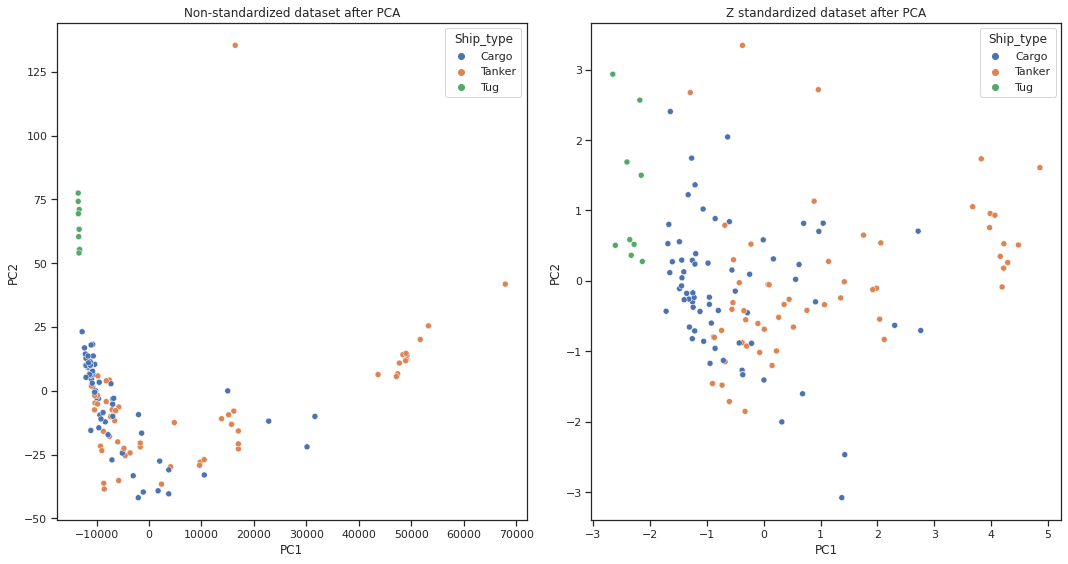

In [321]:
# Script: Plot principal components
# So gonna have a subplot that we can have the scatter plots side by side for 
# comparision and yet the cool thing is, we can add the ship types as different 
# colors that we may see how PCA helps explaining the data!

fig, (ax1, ax2)= plt.subplots(1,2, figsize=(15,8))
# Standardized dataframe
sns.scatterplot(data=scaled_finalFrame, x=scaled_finalFrame.PC1, y=scaled_finalFrame.PC2, hue='Ship_type', ax=ax2)
ax1.set_title('Non-standardized dataset after PCA')
# Non-standardized dataframe
sns.scatterplot(data=nonScaled_finalFrame, x=nonScaled_finalFrame.PC1, y=nonScaled_finalFrame.PC2, hue='Ship_type', ax=ax1)
ax2.set_title('Z standardized dataset after PCA')

fig.tight_layout()
plt.show()

- **d)** How much of the variation is explained with the two principal components? What do you think this means? Where does the variation come from? 

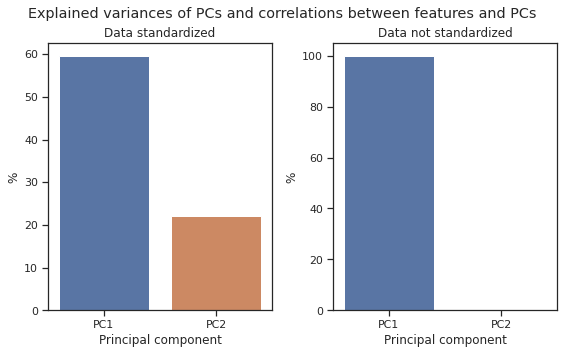

STANDARDIZED data has dimensions (the latter value) (133, 5)
After PCA we have dimensions (133, 2)
How the two PC explain data [0.59642875 0.22044809]
So most important features are listed as
 [[ 0.23376712 -0.06643144  0.54621912  0.56382852  0.56980863]
 [-0.53913639  0.81129475  0.20386406  0.02641842  0.09420344]]
------------------------------------------
NON-STANDARDIZED data has dimensions (the latter value) (133, 5)
After PCA we have dimensions (133, 2)
How the two PC explain data [9.99997234e-01 2.12428547e-06]
So most important features are listed as
 [[ 2.11129556e-05  1.70071009e-05  9.99995981e-01  2.78934311e-03
   5.06096872e-04]
 [-2.19846211e-02  2.69050893e-01  2.71841911e-03 -9.57333434e-01
  -1.03119347e-01]] 

------------------------------------------
The covariance matrix of original dataframe


,Speed,COG,Gross_tonnage,Length,Breadth
Speed,3.851125,-5.037044,7.216663e+03,35.034782,5.832449
COG,-5.037044,249.267414,5.813639e+03,-116.419355,-9.015385
Gross_tonnage,7216.663316,5813.638829,3.418127e+08,953434.882565,172990.837702
Length,35.034782,-116.419355,9.534349e+05,3340.046826,556.044498
Breadth,5.832449,-9.015385,1.729908e+05,556.044498,99.538650


------------------------------------------
[ 2.00340997e-16  9.34924652e-17  0.00000000e+00 -2.67121329e-17
 -5.34242658e-16]
The covariance matrix of standardized data
[[ 1.00757576 -0.16380492  0.20041317  0.31124836  0.30015048]
 [-0.16380492  1.00757576  0.02006776 -0.12855645 -0.0576678 ]
 [ 0.20041317  0.02006776  1.00757576  0.89908003  0.94495434]
 [ 0.31124836 -0.12855645  0.89908003  1.00757576  0.97166175]
 [ 0.30015048 -0.0576678   0.94495434  0.97166175  1.00757576]]


In [322]:
# Script: Explore variation
# So let's have some bar plots and tables to explore the variation

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,5))
fig.suptitle('Explained variances of PCs and correlations between features and PCs')

sns.barplot(x=['PC1', 'PC2'], y=pca1_ratio*100, ax=ax1)
ax1.set_title('Data standardized')
ax1.set_xlabel('Principal component')
ax1.set_ylabel('%')

sns.barplot(x=['PC1', 'PC2'], y=pca2_ratio*100.0, ax=ax2)
ax2.set_title('Data not standardized')
ax2.set_xlabel('Principal component')
ax2.set_ylabel('%')

fig.tight_layout() # nicely fit plots
fig.subplots_adjust(top=0.88) # to get the main title shifted up
plt.show()

# Let's print how much each PC explains of datasets
print('STANDARDIZED data has dimensions (the latter value)', scaled_data.shape)
print('After PCA we have dimensions', pca_data1.shape) # see, we have reduced the dimensions to two dimensions - yay!
print('How the two PC explain data', pca1_ratio)
print('So most important features are listed as\n', pca1_components)
# PC1 explains 59,64% of the variation and PC2 22,04%
print('------------------------------------------')
print('NON-STANDARDIZED data has dimensions (the latter value)', nonStd_frame.shape)
print('After PCA we have dimensions', pca_data2.shape) # see, we have reduced the dimensions to two - yay!
print('How the two PC explain data', pca2_ratio)
print('So most important features are listed as\n', pca2_components, '\n')
# PC1 explains 99,999997% of the variation and PC2 0.000002% ... okey.
print('------------------------------------------')
print('The covariance matrix of original dataframe')
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.cov.html
# .cov() to compute pairwise covariance of columns
display(originless_frame.iloc[:, 1:].cov())
print('------------------------------------------')
# Then I wanna see the covariance matrix of the scaled data too
# https://analyticsindiamag.com/principal-component-analysis-on-matrix-using-python/
# Building the covariance matrix based on the standardized dataframe
mean_vec = np.mean(scaled_data, axis=0) #calculating mean
print(mean_vec)
cov_mat = (scaled_data-mean_vec).T.dot(((scaled_data-mean_vec))/(scaled_data.shape[0]-1))
print('The covariance matrix of standardized data')
print(cov_mat)

<font color = red> If we *don't standardize* the dataset, PC1 is actually explaining the whole data set which means all the variables can be written as a linear transformation of a single one of them. That's a pretty serious, extreme case of linear dependence. I guess this is since one large numeric range is dominating the others (and that must be the range of Gross_tonnage variable), which conveniently brings us to the importance of standardization. 

As we can see the first component (PC1) is explaining 59,64% of the variance in the *standardized* dataset when the second component (PC2) is explaining 22,04%. So after standardization there aren't any really large ranges which would dominate the rest. Z score is telling how many standard deviations (std) the value is from the mean, i.e. what a single value means in relation to the whole dataset. </font>

<font color = red> Since the PCA is about finding the "best" line to maximize the explanation of the variance in the dataset, if the data is not standardized that best line would be distorted alot. However, we are looking for principal components (PC) that show as much variation across the variables as possible and allow to reconstruct the original variables as well as possible. 

<font color = red> As we can see from the two different covariance matrices printed out above, they are quite different cause of the standardization difference. In PCA we calculate the eigenvectors and the eigenvalues based on the covariance matrix to _identify the PCs_. So, as one might notice, the eigenvectors and eigenvalues would vary alot when calculated from the non-standardized matrix than from the standardized one. And that's why PC1 and PC2 are really different too as seen from the barplots. 